# Code Plateau Fellowship; Data Science Track Competition

## Context:

The Tanzanian tourism sector plays a significant role in the Tanzanian economy, contributing about 17% to the country’s GDP and 25% of all foreign exchange revenues. The sector, which provides direct employment for more than 600,000 people and up to 2 million people indirectly, generated approximately $2.4 billion in 2018 according to government statistics. Tanzania received a record 1.1 million international visitor arrivals in 2014, mostly from Europe, the US and Africa.
Tanzania is the only country in the world which has allocated more than 25% of its total area for wildlife, national parks, and protected areas.There are 16 national parks in Tanzania, 28 game reserves, 44 game-controlled areas, two marine parks and one conservation area.


## Objective:

The objective of this competition is to explore and build a linear regression model that will predict the spending behaivior of tourists visiting Tanzania.The model can be used by different tour operators and the Tanzania Tourism Board to automatically help tourists across the world estimate their expenditure before visiting Tanzania. 


## Data Description

The dataset describes 6476 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania.The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth.
The survey covers seven departure points, namely: Julius Nyerere International Airport, Kilimanjaro International Airport, Abeid Amani Karume International Airport, and the Namanga, Tunduma, Mtukula and Manyovu border points.


## Importing necessary libraries and data

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [22]:
#importing datasets
tz_train = pd.read_csv('Train .csv')
tz_test = pd.read_csv('Test .csv')

## Data Overview

- Observations
- Sanity checks

In [23]:
tz_train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [24]:
tz_train.tail()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0
4808,tour_999,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,4.0,7.0,Cash,Yes,Friendly People,13260000.0


In [25]:
tz_train.shape

(4809, 23)

In [26]:
tz_train.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


#DATA OBSERVATION 

In [27]:
#DATA OBSERVATION
tz_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [28]:
tz_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

In [29]:
#checking for duplicates
print('train duplicates:', tz_train.duplicated().sum()) #duplicates in train data
print('test duplicates:', tz_test.duplicated().sum()) #duplicates in test data

train duplicates: 0
test duplicates: 0


In [30]:
#checking for missing/NaN values in train data
tz_train.isnull().sum()


ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [31]:
#checking for missing/NaN values in test data
tz_test.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='age_group', ylabel='count'>

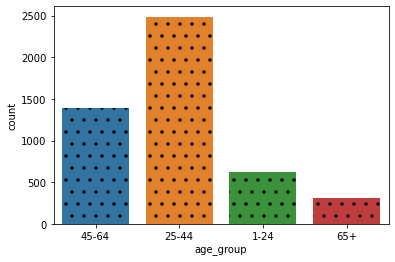

In [32]:
sns.countplot(data=tz_train, x= 'age_group', hatch=".")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Wildlife tourism'),
  Text(1, 0, 'Cultural tourism'),
  Text(2, 0, 'Mountain climbing'),
  Text(3, 0, 'Beach tourism'),
  Text(4, 0, 'Conference tourism'),
  Text(5, 0, 'Hunting tourism'),
  Text(6, 0, 'Bird watching'),
  Text(7, 0, 'business'),
  Text(8, 0, 'Diving and Sport Fishing')])

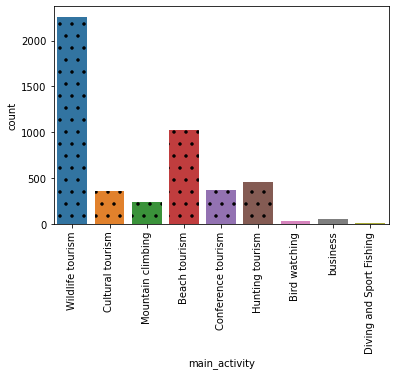

In [33]:
sns.countplot(data=tz_train, x='main_activity',hatch="." )
plt.xticks(rotation= 90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Friends, relatives'),
  Text(1, 0, 'others'),
  Text(2, 0, 'Travel, agent, tour operator'),
  Text(3, 0, 'Radio, TV, Web'),
  Text(4, 0, 'Tanzania Mission Abroad'),
  Text(5, 0, 'inflight magazines'),
  Text(6, 0, 'Newspaper, magazines,brochures'),
  Text(7, 0, 'Trade fair')])

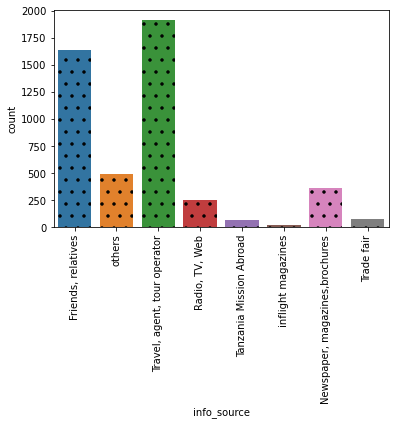

In [34]:
sns.countplot(data=tz_train, x='info_source', hatch=".")
plt.xticks(rotation= 90)

<AxesSubplot:xlabel='tour_arrangement', ylabel='count'>

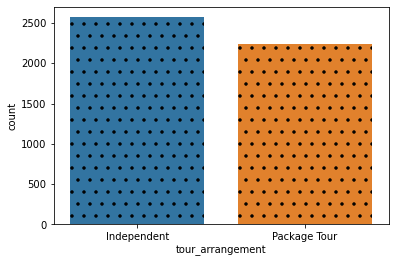

In [35]:
sns.countplot(data=tz_train, x='tour_arrangement', hatch=".")

<AxesSubplot:xlabel='package_insurance', ylabel='count'>

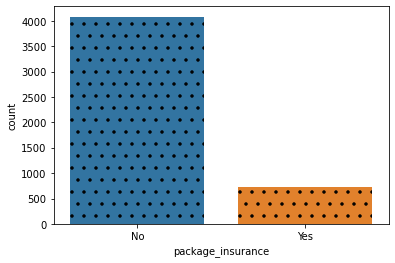

In [36]:
sns.countplot(data=tz_train, x='package_insurance', hatch=".")

sns.countplot(data=tz_train, x='most_impressing', hatch="+x")
plt.xticks(rotation=90)


OBSERVATIONS

The univariate analysis of the AGE GROUP feature shows the highest age group amongst the tourists are people between the age group 25-44 years while the least visiting age group are people 65 years and above. This shows less elderly tourist visit Tanzania.

This exploration shows the most explored activity is wildlife tourism, followed by beach tourism. The least explored activities are driving and sport fishing and bird watching.

The highest information source for tourists is travel agent, tour operator, followed by friends and relatives . The least information source is in-flight magazine followed by Tanzania mission abroad.

More tourists arrange for their visit independently than using a packaged tour. However, the difference from visualization is not much.

Few tourist use package insurance, effort should be made to improve the package insurance deal to make it more attractive to tourists.

The most impressing feature for tourist is friendly people followed by wildlife, only few tourist hope to come back, attention should be giving to other factors like good service so more tourist can hope to come back.

##BIVARIATE ANALYSIS

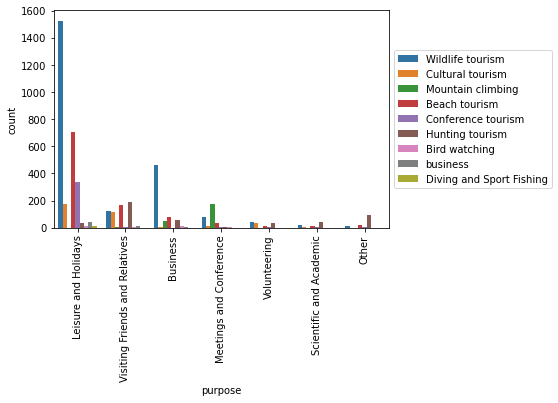

In [37]:
sns.countplot(x='purpose',data=tz_train,hue="main_activity")
plt.xticks(rotation=90)
plt.legend(loc="center left",bbox_to_anchor=(1.0,0.5))

In [38]:
OBSERVATION People who came in for holidays and business enjoyed wildlife tourism and beach tourism the most, all group of tourist have potential of exploring the tourism sights. More promo and discounts is recommend for volunteering and academic visitors to encourage their patronage.

SyntaxError: invalid syntax (469413122.py, line 1)

**Questions**:
1. What are the top 5 countries with the highest spending statistic ?  

2. which age-group are the highest spenders and who are the over all highest spenders by travel with? 
 
3. which country are have the most spending tourists? 
 
4. what is the average number of nights a toursits spends in Tanzania mainland?

5. what is the average number of nights a toursits spends in Zanzibar?
 
5. what is the most prefered payment mode by tourists?

7. Highlight the Aspects of tourism that are more profitable and in which it is worthwhile to invest in

8. what is the most sort after food by tourists?

9. 



##Top 5 countries with the highest spending statistics.


In [39]:
#groupby country to get total spending by country
tz_train.groupby('country')['total_cost'].sum().sort_values(ascending=False).head()

country
UNITED STATES OF AMERICA    8.890832e+09
UNITED KINGDOM              3.808383e+09
ITALY                       3.762160e+09
FRANCE                      3.344496e+09
AUSTRALIA                   2.743132e+09
Name: total_cost, dtype: float64

United States have the highest spending Statistics on the Tanzanian Tourism


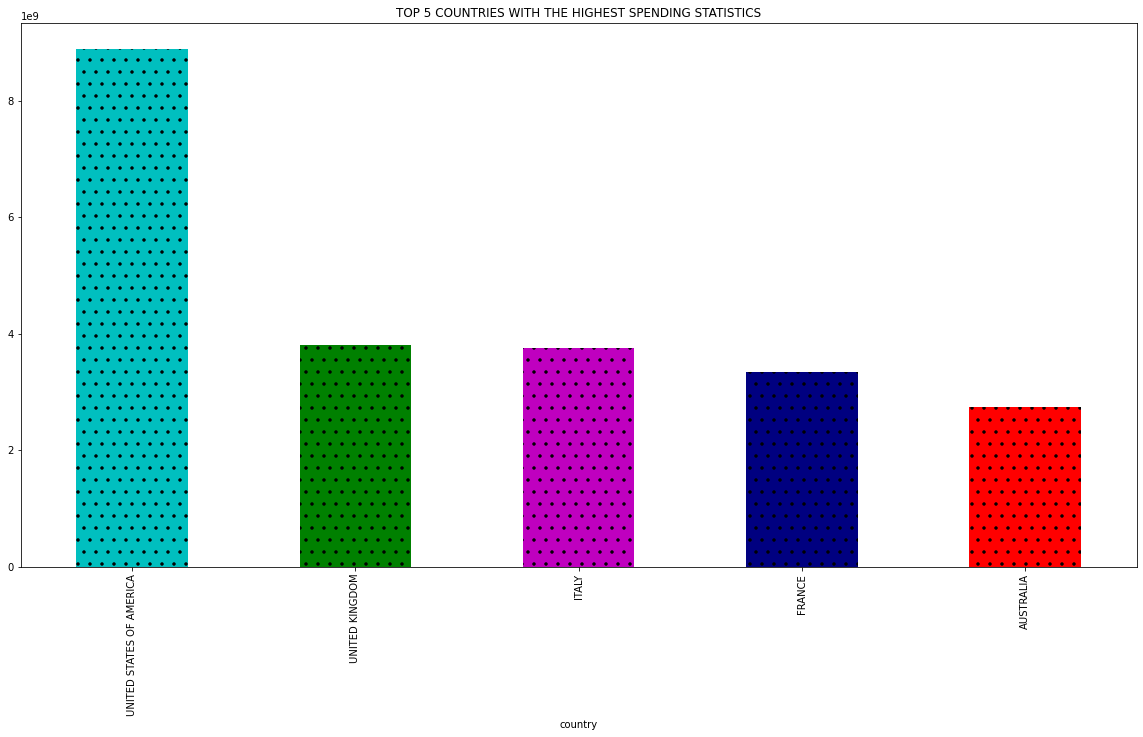

In [40]:
#top 5 countries with highest spending stats visualization
top_5 = (tz_train.groupby('country')['total_cost'].sum()).nlargest().plot(kind='bar',color=['c','g','m','navy','r'],
hatch='.',title='TOP 5 COUNTRIES WITH THE HIGHEST SPENDING STATISTICS',figsize=(20, 10))
print("""United States have the highest spending Statistics on the Tanzanian Tourism""")

The top five vountries with the highest spenders are:

1. UNITED STATES OF AMERICA ~ 8.8 billion TZS.
2. UNITED KINGDOM ~ 3.8 billion TZS.
3. ITALY ~ 3.7 billion TZS.
4. FRANCE ~ 3.3 billion TZS.
5. AUSTRALIA ~ 2.7 billion TZS.


##Age group with the highest spending

In [41]:
#groupby age_group to get total spending by age group
tz_train.groupby('age_group')['total_cost'].sum().sort_values(ascending=False)

age_group
45-64    1.537184e+10
25-44    1.498710e+10
65+      5.284068e+09
1-24     3.379088e+09
Name: total_cost, dtype: float64

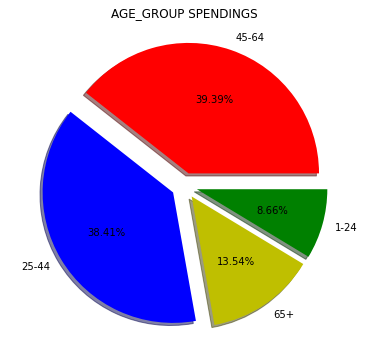

In [42]:
ag_sp_tw = tz_train.groupby(['age_group'])['total_cost'].sum().nlargest().plot(kind='pie',
autopct = '%1.2f%%',colors=['r','blue','y','g'],title='AGE_GROUP SPENDINGS',
explode = (0.1,0.1,0.1,0.1),shadow = True, figsize=[6,6],ylabel = ' ',)

'This visualisation shows age 25_44 having the highest spending, although the variance is not large'

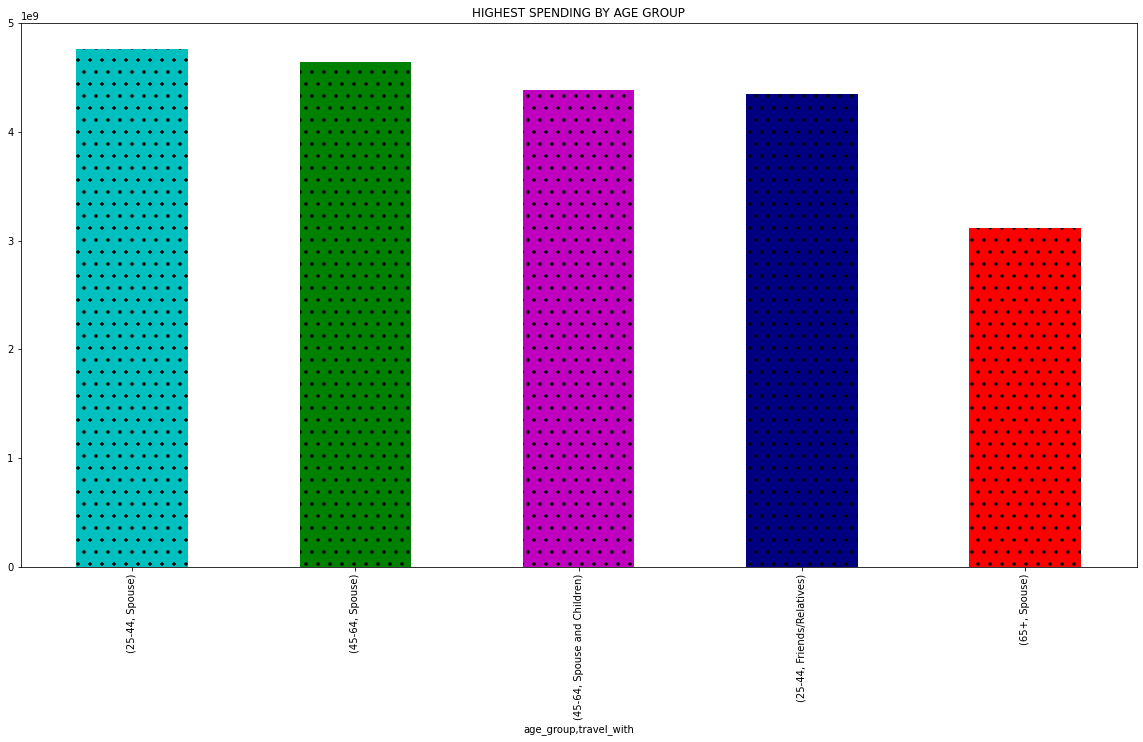

In [43]:
ag_sp_tw = tz_train.groupby(['age_group','travel_with'])['total_cost'].sum().nlargest().plot(kind='bar',color=['c','g','m','navy','r'],
hatch='.',title='HIGHEST SPENDING BY AGE GROUP',figsize=(20, 10))
"""This visualisation shows age 25_44 having the highest spending, although the variance is not large"""

##PIE CHART VIEW

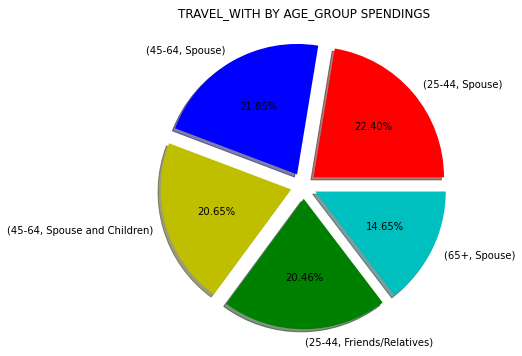

In [44]:
#which age-group are the highest spenders and who are the over all highest spenders by travel with?
ag_sp_tw = tz_train.groupby(['age_group','travel_with'])['total_cost'].sum().nlargest().plot(kind='pie',
autopct = '%1.2f%%',colors=['r','blue','y','g','c'],title='TRAVEL_WITH BY AGE_GROUP SPENDINGS',
explode = (0.1,0.1,0.1,0.1,0.1),shadow = True, figsize=[6,6],ylabel = ' ',)

* Tourists within the 45-64 years age group are the highest spenders with a total spending of over 15 billion TZS followed closely by 25-44 with a total spending just shy of 15 billion.

##Highest spenders by travel_with.

In [45]:
#groupby travel_with to get total spending by travel company
tz_train.groupby('travel_with')['total_cost'].sum().sort_values(ascending=False)

travel_with
Spouse                 1.274631e+10
Friends/Relatives      9.158700e+09
Spouse and Children    6.745753e+09
Alone                  4.334079e+09
Children               1.653502e+09
Name: total_cost, dtype: float64

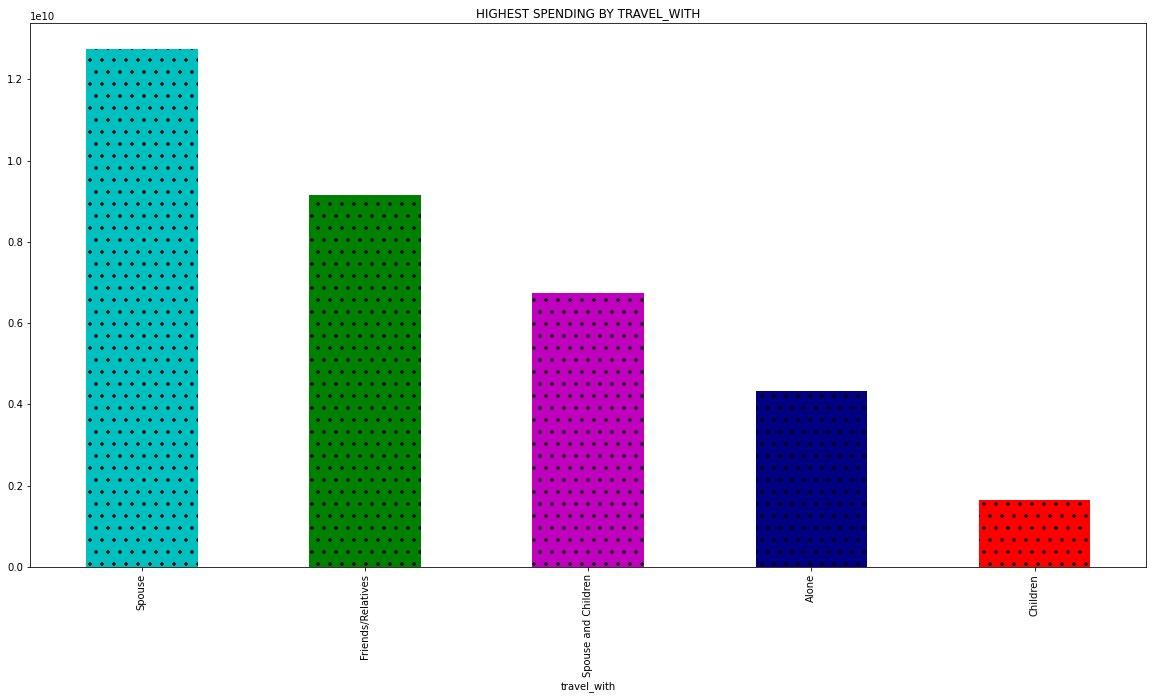

In [46]:
#bar chart of highest spenders by travel_with
ag_sp_tw = tz_train.groupby(['travel_with'])['total_cost'].sum().nlargest().plot(kind='bar',color=['c','g','m','navy','r'],
hatch='.',title='HIGHEST SPENDING BY TRAVEL_WITH',figsize=(20, 10))

Those that travelled with just their spouses spent more than any other group with a net expenditure of about 15 billion TZS.

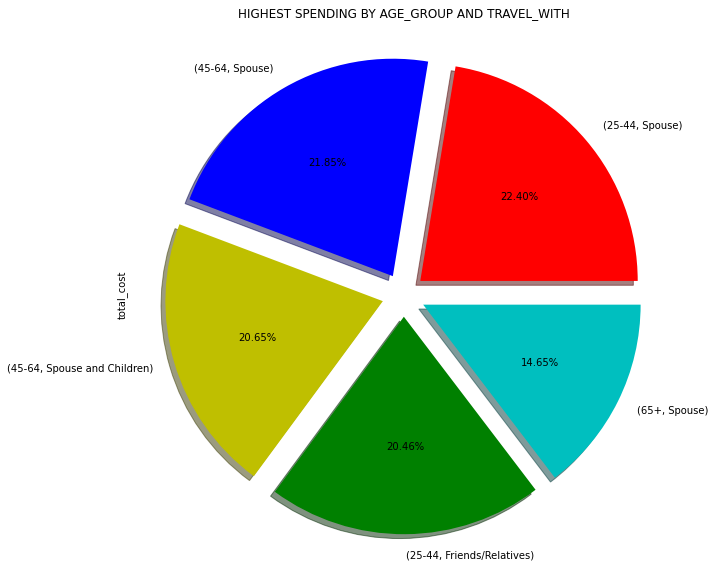

In [47]:
#which age-group are the highest spenders and who are the over all highest spenders by travel with?
ag_sp_tw = tz_train.groupby(['age_group','travel_with'])['total_cost'].sum().nlargest().plot(kind='pie',
autopct = '%1.2f%%',colors=['r','blue','y','g','c'],title='HIGHEST SPENDING BY AGE_GROUP AND TRAVEL_WITH',
explode = (0.1,0.1,0.1,0.1,0.1),shadow = True, figsize=[20, 10])

##Country with the most spending tourists.

In [48]:
#create column of total tourists in a group
#part of feature engineering
tz_train['total_tourists'] = tz_train['total_female'] + tz_train['total_male'] # create a total_tourists column in train data
tz_test['total_tourists'] = tz_test['total_female'] + tz_test['total_male'] # create a total_tourists in column in 

In [49]:
#create column of total spending per person in a group
tz_train['total_spending_pp'] = tz_train['total_cost']/(tz_train['total_tourists'])


In [50]:
#groupby country to get highest spending per person
tz_train.groupby('country')['total_spending_pp'].sum().sort_values(ascending=False)

country
ITALY                       1.625437e+09
SOUTH AFRICA                1.346201e+09
DENMARK                     4.482293e+08
NETHERLANDS                 4.347691e+08
SWIZERLAND                  3.452496e+08
                                ...     
SPAIN                                NaN
UGANDA                               NaN
UNITED KINGDOM                       NaN
UNITED STATES OF AMERICA             NaN
ZIMBABWE                             NaN
Name: total_spending_pp, Length: 105, dtype: float64

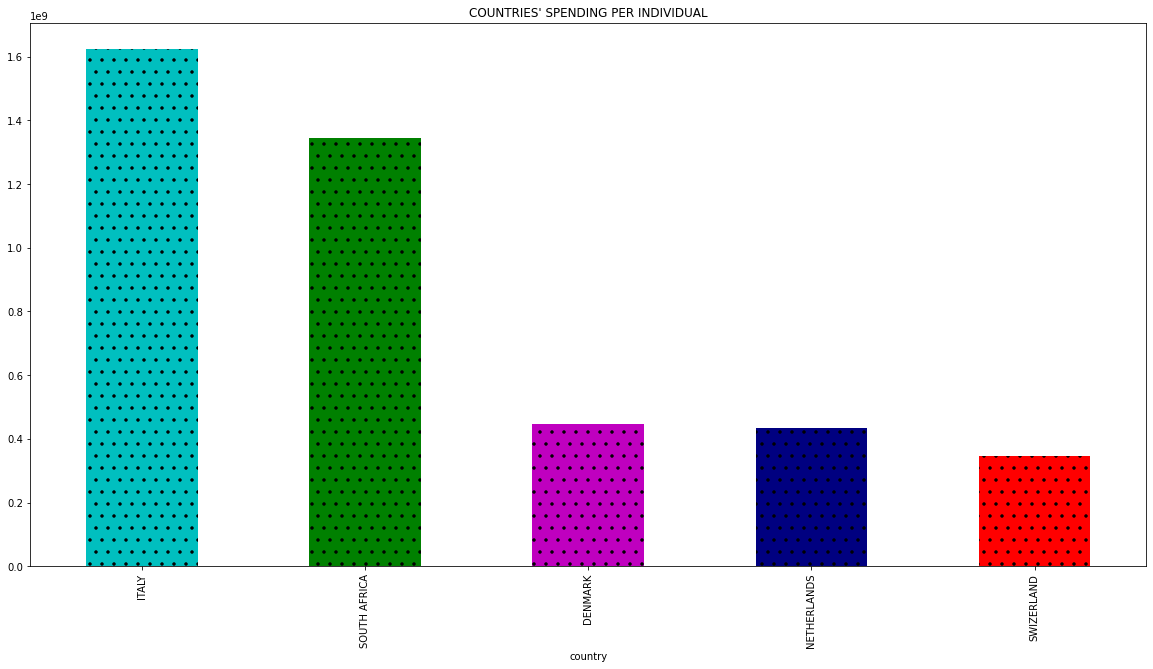

In [51]:
#bar chart of countries' spending per individual
ag_sp_tw = tz_train.groupby(['country'])['total_spending_pp'].sum().nlargest().plot(kind='bar',color=['c','g','m','navy','r'],
hatch='.',title="COUNTRIES' SPENDING PER INDIVIDUAL",figsize=(20, 10))

* Italy have the highest spending per person with an average of about 1.6 billion TZS. This might not be accurate because there is incomplete data.

##Average number of nights tourists spent in Tanzania Mainland.

In [52]:
round(tz_train.night_mainland.mean())

8

On average, tourists spend 8 nights in the Tanzania Mainland.

In [53]:
round(tz_train.night_zanzibar.mean())

2

On average, tourists spend 2 nights in Zanzibar.

##The most preferred payment mode by tourists.

In [54]:
#groupby payment_mode to get the most preferred payment mode by tourists
tz_train.groupby('payment_mode')['total_cost'].count().sort_values(ascending=False)

payment_mode
Cash                 4172
Credit Card           622
Other                   8
Travellers Cheque       7
Name: total_cost, dtype: int64

In [55]:
#calculating the percentage of the most preferred payment method
(4172/(tz_train.groupby('payment_mode')['total_cost'].count().sum())) * 100

86.75400291120815

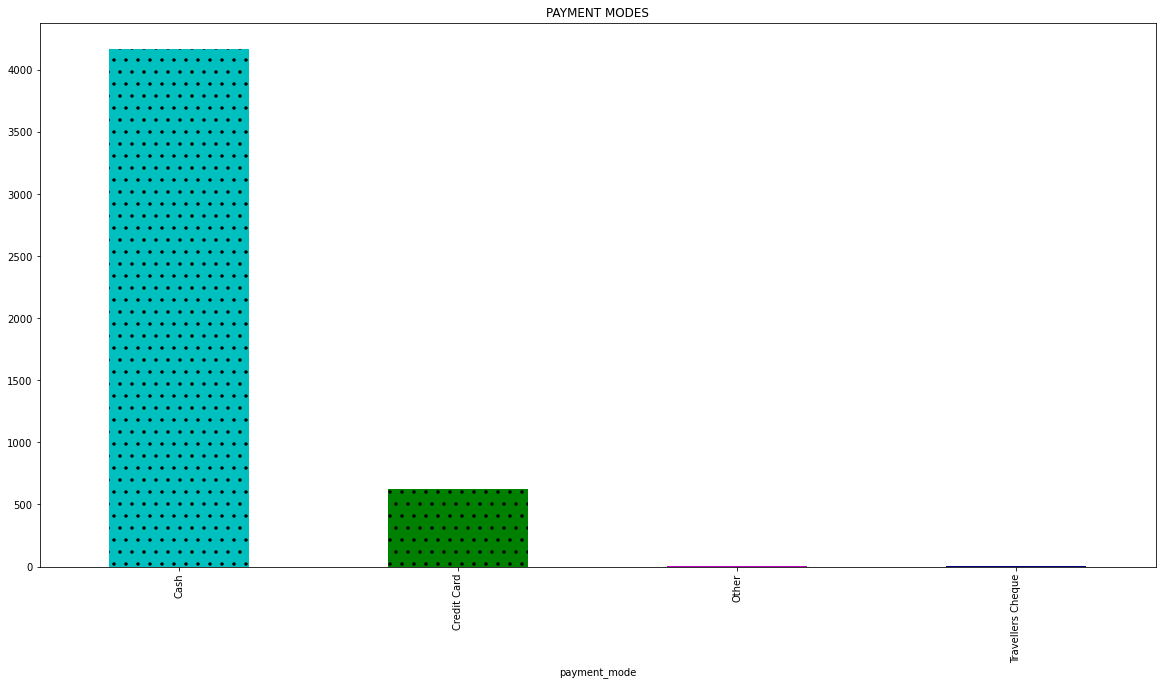

In [56]:
#bar chart of countries' spending per individual
ag_sp_tw = tz_train.groupby('payment_mode')['total_cost'].count().nlargest().plot(kind='bar',color=['c','g','m','navy','r'],
hatch='.',title="PAYMENT MODES",figsize=(20, 10))

* Most of the tourists prefer to pay with cash(~86.7% of the tour groups).

##Most profitable aspects of tourism in Tanzania.

In [57]:
#groupby main_activity to see the main activity tourists spent more on
tz_train.groupby('main_activity')['total_cost'].sum().sort_values(ascending=False)


main_activity
Wildlife tourism            2.393484e+10
Beach tourism               7.712958e+09
Conference tourism          3.782597e+09
Cultural tourism            1.432819e+09
Hunting tourism             8.734764e+08
business                    4.712545e+08
Mountain climbing           4.359085e+08
Diving and Sport Fishing    2.222264e+08
Bird watching               1.560128e+08
Name: total_cost, dtype: float64

<AxesSubplot:title={'center':'CTIVITY SPENDING'}, xlabel='main_activity'>

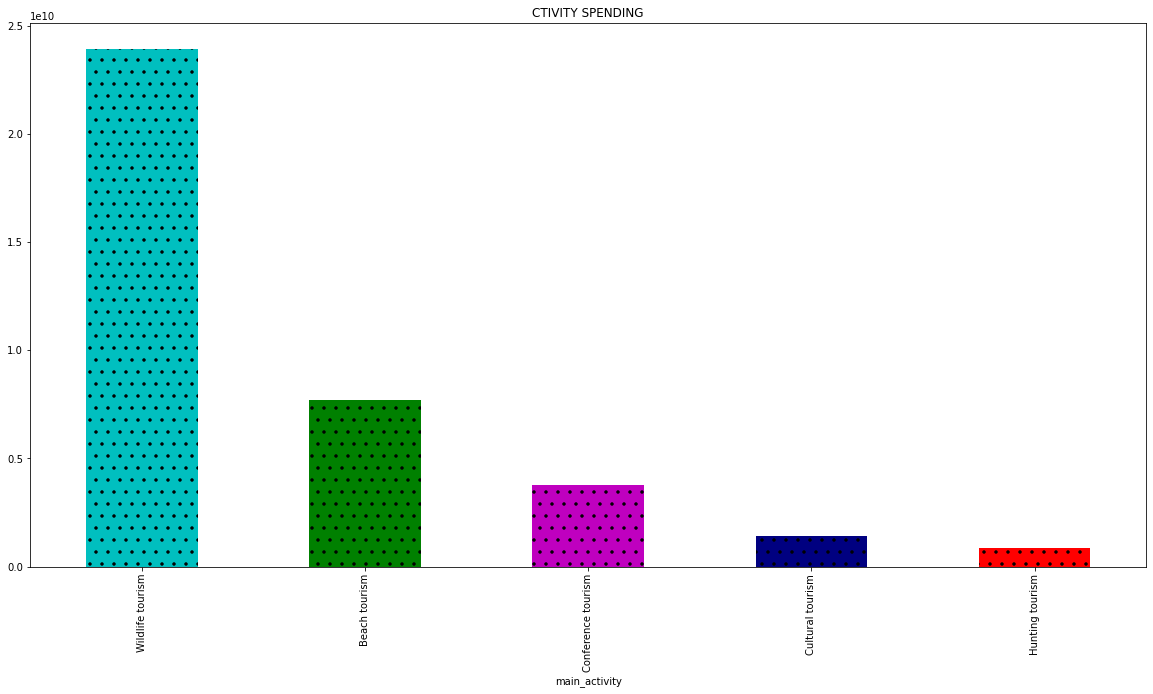

In [58]:
#bar chart of main_activity costs
tz_train.groupby('main_activity')['total_cost'].sum().nlargest().plot(kind='bar',color=['c','g','m','navy','r'],
hatch='.',title="CTIVITY SPENDING",figsize=(20, 10))

In [59]:
#the main_activity frequency
tz_train['main_activity'].value_counts()

Wildlife tourism            2259
Beach tourism               1025
Hunting tourism              457
Conference tourism           367
Cultural tourism             359
Mountain climbing            234
business                      58
Bird watching                 37
Diving and Sport Fishing      13
Name: main_activity, dtype: int64

<AxesSubplot:title={'center':'CTIVITY FREQUENCY'}>

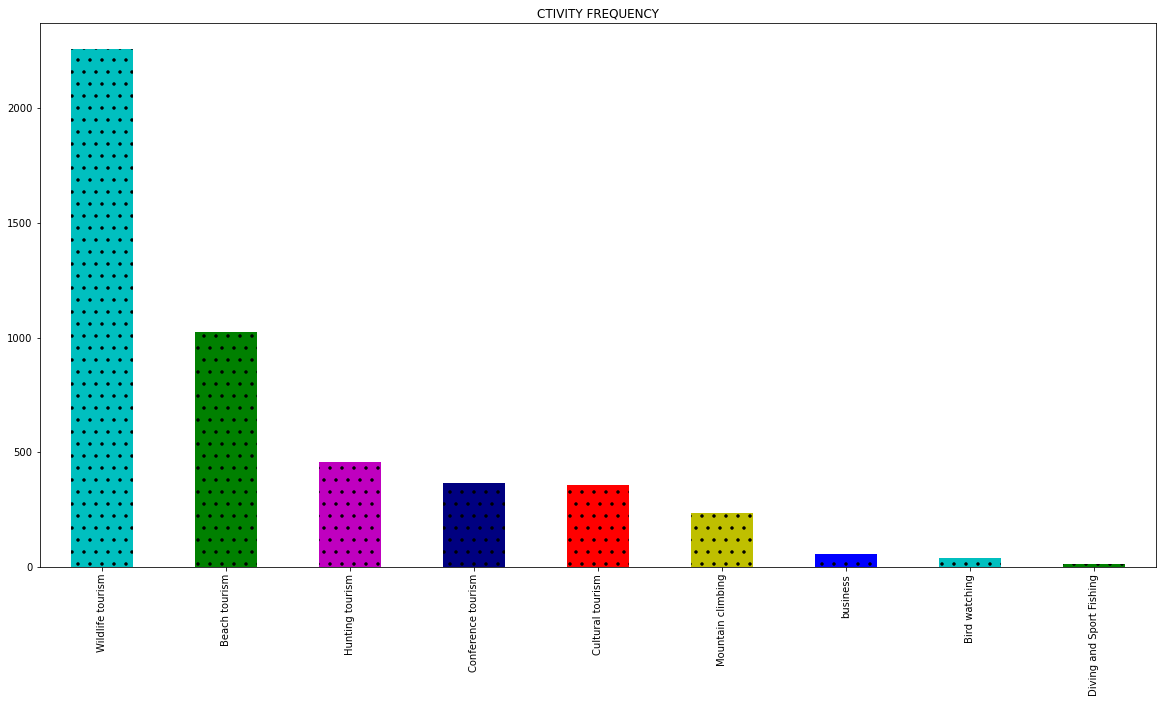

In [60]:
#bar chart of main_activity costs
tz_train['main_activity'].value_counts().sort_values(ascending=False).plot(kind='bar',color=['c','g','m','navy','r', 'y', 'b'],
hatch='.',title="CTIVITY FREQUENCY",figsize=(20, 10))

* Wildlife tourism is clearly the most chosen main activity and tourists that participated spent considerably more than those who had other main activities.

##Most sought after foods by tourists.

* No info on foods consumed by tourists in data.

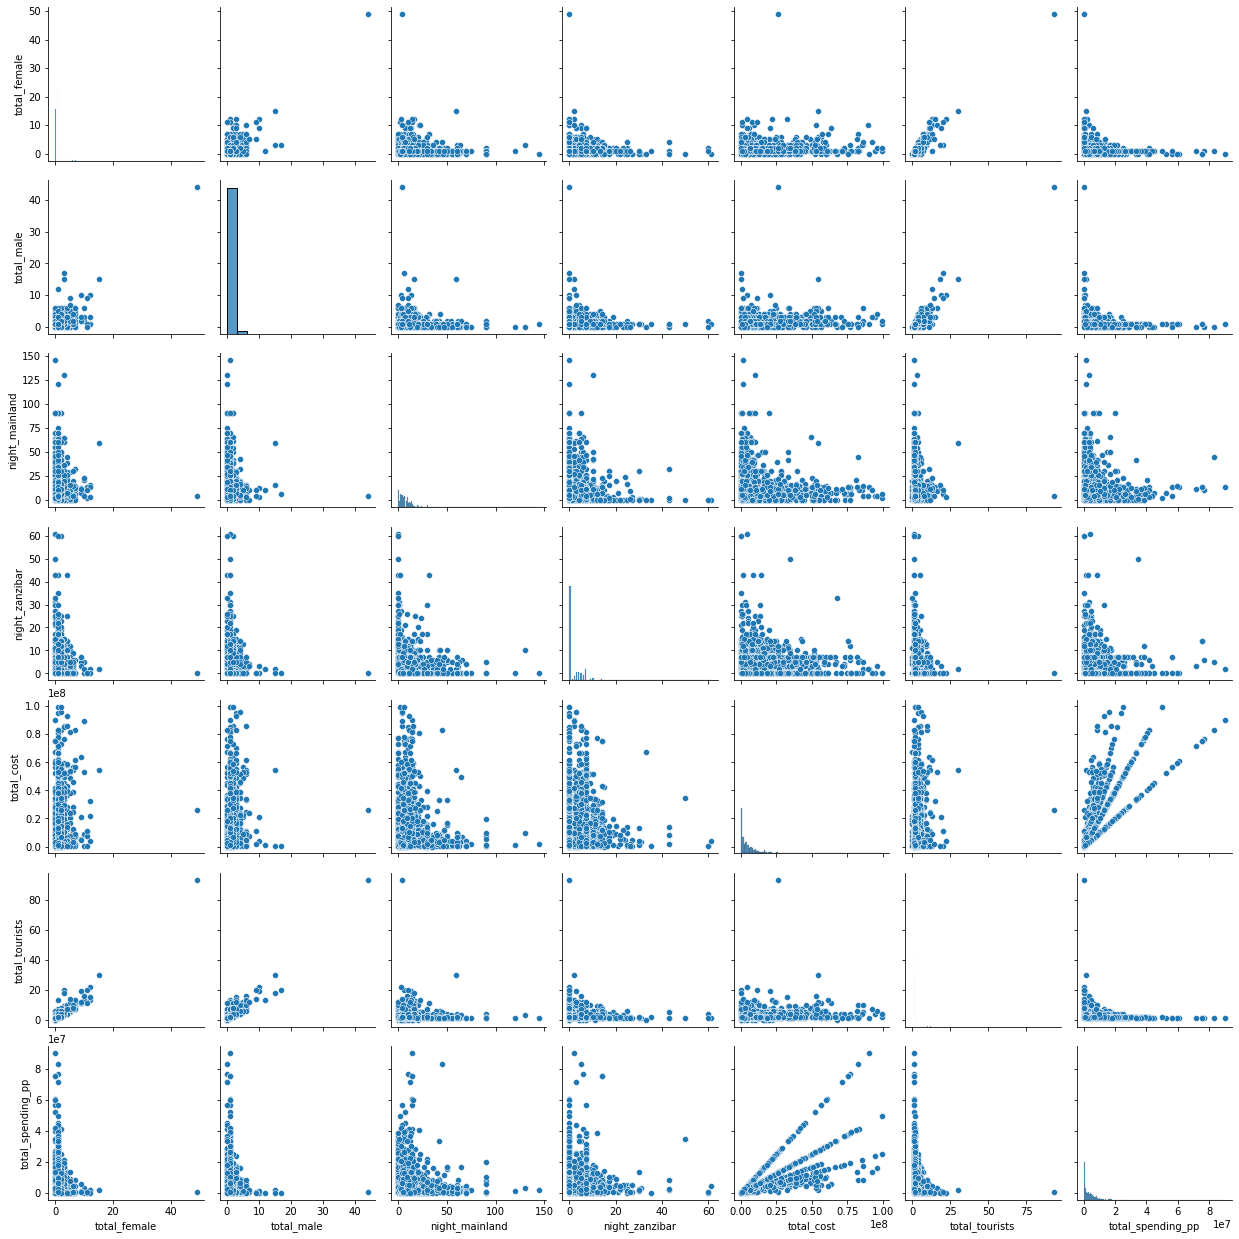

In [61]:
#pairplot to explore relationship between features
sns.pairplot(tz_train)

<AxesSubplot:>

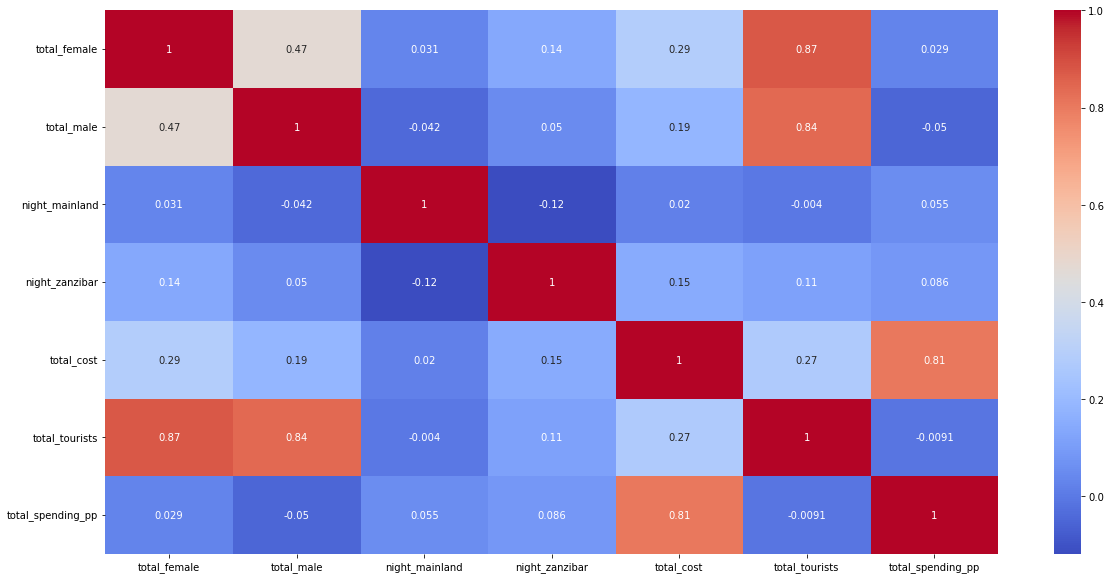

In [62]:
#heatmap to show correlation between features
plt.figure(figsize = (20, 10))
sns.heatmap(tz_train.corr(),cmap='coolwarm',annot=True)

* There is a slight correlation between total_tourists and night_zanzibar with the total_cost.

##Data Preprocessing
* Missing value treatment (if needed)
* Feature engineering
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Feature importance
* scaling

In [63]:
#create column that displays total of male and female tourists in a group
tz_train['total_tourists'] = tz_train['total_female'] + tz_train['total_male'] # create a total_tourists column in train data
tz_test['total_tourists'] = tz_test['total_female'] + tz_test['total_male'] # create a total_tourists in column in 

In [64]:
#create column that displays total nights tourists spent
tz_train['total_nights'] = tz_train['night_mainland'] + tz_train['night_zanzibar'] # create a total_tourists column in train data
tz_test['total_nights'] = tz_test['night_zanzibar'] + tz_test['night_mainland'] # create a total_tourists in colum

In [65]:
tz_train['total_spending_pp'] = tz_train['total_cost']/(tz_train['total_tourists'])#create a columns of total spending

In [66]:
#conditional statement that picks NaN cells and fills them with most likelby arrangements
tz_train.loc[(tz_train['total_tourists'] == 0) & (tz_train['travel_with'] == 'Spouse'), 
('total_male', 'total_female', 'total_tourists')] = (1, 1, 2)
tz_test.loc[(tz_test['total_tourists'] == 0) & (tz_test['travel_with'] == 'Spouse'),#fixing test total_male & total_female values for
('total_male', 'total_female', 'total_tourists')] = (1, 1, 2)#entries with 0 total_tourists

In [67]:
#fixing train total_tourists values for entries with 0 total_tourists & travel_with == 'Alone'
tz_train.loc[(tz_train['total_tourists'] == 0) & (tz_train['travel_with'] == 'Alone'),'total_tourists'] = 1        
#fixing test total_tourists values for entries with 0 total_tourists & travel_with == 'Alone'            
tz_test.loc[(tz_test['total_tourists'] == 0) & (tz_test['travel_with'] == 'Alone'),'total_tourists'] = 1

In [68]:
#note that total_tourists will be NaN if total_male|total_female is NaN 
#fill train NaN travel_with with 'Alone' if total_tourists is 1
tz_train.loc[(tz_train['total_tourists'] == 1), 'travel_with'] = 'Alone' 
#fill test NaN travel_with with 'Alone' if total_tourists is 1
tz_test.loc[(tz_test['total_tourists'] == 1), 'travel_with'] = 'Alone' 

In [69]:
#fill train NaN travel_with with 'Spouse' if tour group has 1 male & 1 female
tz_train.loc[(tz_train['total_male'] == 1) & (tz_train['total_female'] == 1), 'travel_with'] = 'Spouse'
#fill test NaN travel_with with 'Spouse' if tour group has 1 male & 1 female
tz_test.loc[(tz_test['total_male'] == 1) & (tz_test['total_female'] == 1), 'travel_with'] = 'Spouse' 

In [70]:
#fill the remaining NaN travel_with cells with 'Friends/Relatives' if total_male|total_female > 1 member
tz_train.loc[tz_train['travel_with'].isnull() & ((tz_train['total_male'] > 1) | (tz_train['total_female'] > 1)), 'travel_with'] = 'Friends/Relatives' 
tz_test.loc[tz_test['travel_with'].isnull() & ((tz_test['total_male'] > 1) | (tz_test['total_female'] > 1)), 'travel_with'] = 'Friends/Relatives'

In [71]:
tz_test.age_group.value_counts()
#the '24-Jan' category should be '1-24'

25-44     866
45-64     447
24-Jan    202
65+        86
Name: age_group, dtype: int64

In [72]:
#replace '24-Jan' with '1-24'
tz_test.loc[(tz_test['age_group'] == '24-Jan'), 'age_group'] = '1-24'

In [73]:
tz_test.age_group.value_counts()
#the '24-Jan' category should be '1-24'

25-44    866
45-64    447
1-24     202
65+       86
Name: age_group, dtype: int64

In [75]:
#drop the remaining NaN entries since not enough info to fill
tz_train.dropna(inplace=True)
tz_test.dropna(inplace=True)

##Explorating Data Analysis

In [ ]:
* It is a good idea to explore the data once again after manipulating it.

In [76]:
tz_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4488 entries, 0 to 4808
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4488 non-null   object 
 1   country                4488 non-null   object 
 2   age_group              4488 non-null   object 
 3   travel_with            4488 non-null   object 
 4   total_female           4488 non-null   float64
 5   total_male             4488 non-null   float64
 6   purpose                4488 non-null   object 
 7   main_activity          4488 non-null   object 
 8   info_source            4488 non-null   object 
 9   tour_arrangement       4488 non-null   object 
 10  package_transport_int  4488 non-null   object 
 11  package_accomodation   4488 non-null   object 
 12  package_food           4488 non-null   object 
 13  package_transport_tz   4488 non-null   object 
 14  package_sightseeing    4488 non-null   object 
 15  pack

In [77]:
tz_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 0 to 1600
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1486 non-null   object 
 1   country                1486 non-null   object 
 2   age_group              1486 non-null   object 
 3   travel_with            1486 non-null   object 
 4   total_female           1486 non-null   float64
 5   total_male             1486 non-null   float64
 6   purpose                1486 non-null   object 
 7   main_activity          1486 non-null   object 
 8   info_source            1486 non-null   object 
 9   tour_arrangement       1486 non-null   object 
 10  package_transport_int  1486 non-null   object 
 11  package_accomodation   1486 non-null   object 
 12  package_food           1486 non-null   object 
 13  package_transport_tz   1486 non-null   object 
 14  package_sightseeing    1486 non-null   object 
 15  pack

In [78]:
#DATA OBSERVATION
tz_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4488 entries, 0 to 4808
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4488 non-null   object 
 1   country                4488 non-null   object 
 2   age_group              4488 non-null   object 
 3   travel_with            4488 non-null   object 
 4   total_female           4488 non-null   float64
 5   total_male             4488 non-null   float64
 6   purpose                4488 non-null   object 
 7   main_activity          4488 non-null   object 
 8   info_source            4488 non-null   object 
 9   tour_arrangement       4488 non-null   object 
 10  package_transport_int  4488 non-null   object 
 11  package_accomodation   4488 non-null   object 
 12  package_food           4488 non-null   object 
 13  package_transport_tz   4488 non-null   object 
 14  package_sightseeing    4488 non-null   object 
 15  pack

In [79]:
tz_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 0 to 1600
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1486 non-null   object 
 1   country                1486 non-null   object 
 2   age_group              1486 non-null   object 
 3   travel_with            1486 non-null   object 
 4   total_female           1486 non-null   float64
 5   total_male             1486 non-null   float64
 6   purpose                1486 non-null   object 
 7   main_activity          1486 non-null   object 
 8   info_source            1486 non-null   object 
 9   tour_arrangement       1486 non-null   object 
 10  package_transport_int  1486 non-null   object 
 11  package_accomodation   1486 non-null   object 
 12  package_food           1486 non-null   object 
 13  package_transport_tz   1486 non-null   object 
 14  package_sightseeing    1486 non-null   object 
 15  pack

In [80]:
#checking for duplicates
print('train duplicates:', tz_train.duplicated().sum()) #duplicates in train data
print('test duplicates:', tz_test.duplicated().sum()) #duplicates in test data

train duplicates: 0
test duplicates: 0


In [81]:
#checking for missing/NaN values in train data
tz_train.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
total_tourists           0
total_spending_pp        0
total_nights             0
dtype: int64

In [82]:
#checking for missing/NaN values in test data
tz_test.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_tourists           0
total_nights             0
dtype: int64

##ANSWERING THE OBJECTIVE QUESTIONS AGAIN AFTER DATA CLEANING.

In [ ]:
Questions:

1. What are the top 5 countries with the highest spending statistic ?

2. Which age-group are the highest spenders and who are the over all highest spenders by travel with?

3. Which country are have the most spending tourists?

4. What is the average number of nights tourists spend in Tanzania Mainland?

5. What is the average number of nights a tourists spend in Zanzibar?

6. What is the most prefered payment mode by tourists?

7. Highlight the aspects of tourism that are more profitable and in which it is worthwhile to invest in.

8. What is the most sought after food by tourists?

9. Who are the over all highest spenders by travel with?



Top 5 countries with the highest spending statistics.

In [83]:
#groupby country to get total spending by country
tz_train.groupby('country')['total_cost'].sum().sort_values(ascending=False).head()

country
UNITED STATES OF AMERICA    8.774869e+09
UNITED KINGDOM              3.699271e+09
ITALY                       3.570687e+09
FRANCE                      3.268358e+09
AUSTRALIA                   2.741557e+09
Name: total_cost, dtype: float64

United States have the highest spending Statistics on the Tanzanian Tourism


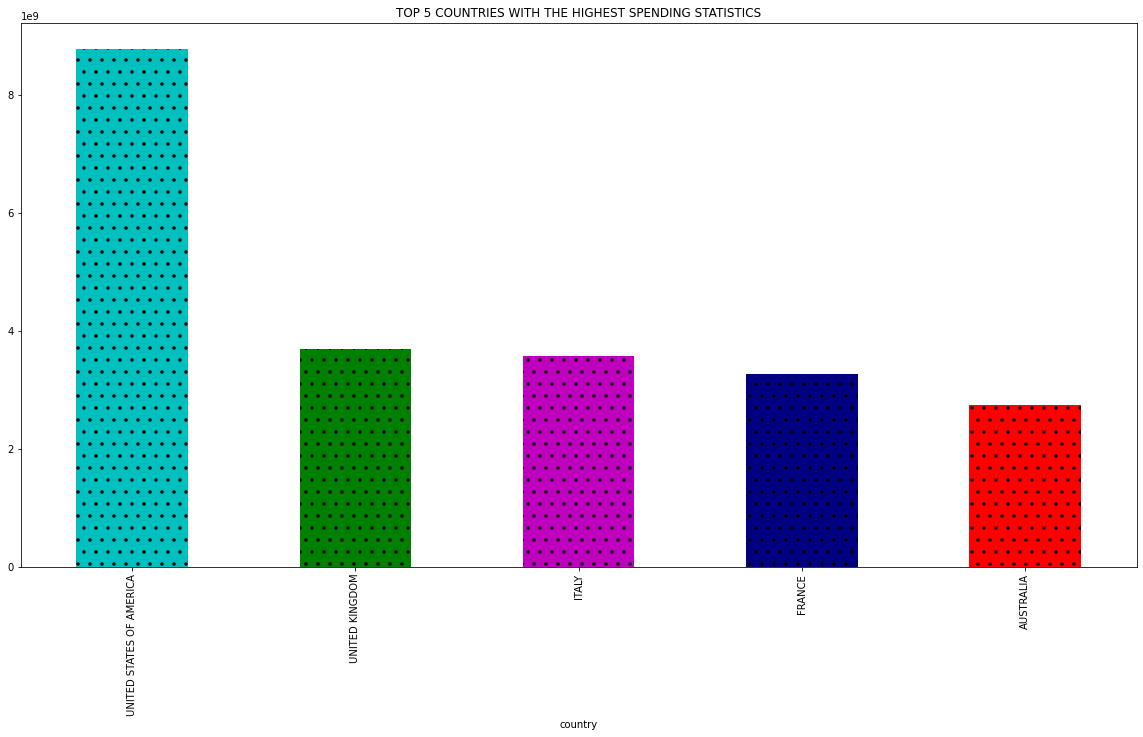

In [84]:

#top 5 countries with highest spending stats visualization
top_5 = (tz_train.groupby('country')['total_cost'].sum()).nlargest().plot(kind='bar',color=['c','g','m','navy','r'],
hatch='.',title='TOP 5 COUNTRIES WITH THE HIGHEST SPENDING STATISTICS',figsize=(20, 10))
print("""United States have the highest spending Statistics on the Tanzanian Tourism""")

In [ ]:
The top five vountries with the highest spenders are:

1. UNITED STATES OF AMERICA ~ 8.8 billion TZS.
2. UNITED KINGDOM ~ 3.7 billion TZS.
3. ITALY ~ 3.6 billion TZS.
4. FRANCE ~ 3.3 billion TZS.
5. AUSTRALIA ~ 2.7 billion TZS.

Age group with the highest spending.

In [85]:
#groupby age_group to get total spending by age group
tz_train.groupby('age_group')['total_cost'].sum().sort_values(ascending=False)

age_group
45-64    1.499861e+10
25-44    1.432430e+10
65+      5.228659e+09
1-24     3.281574e+09
Name: total_cost, dtype: float64

'This visualisation shows age 25_44 having the highest spending, although the variance is not large'

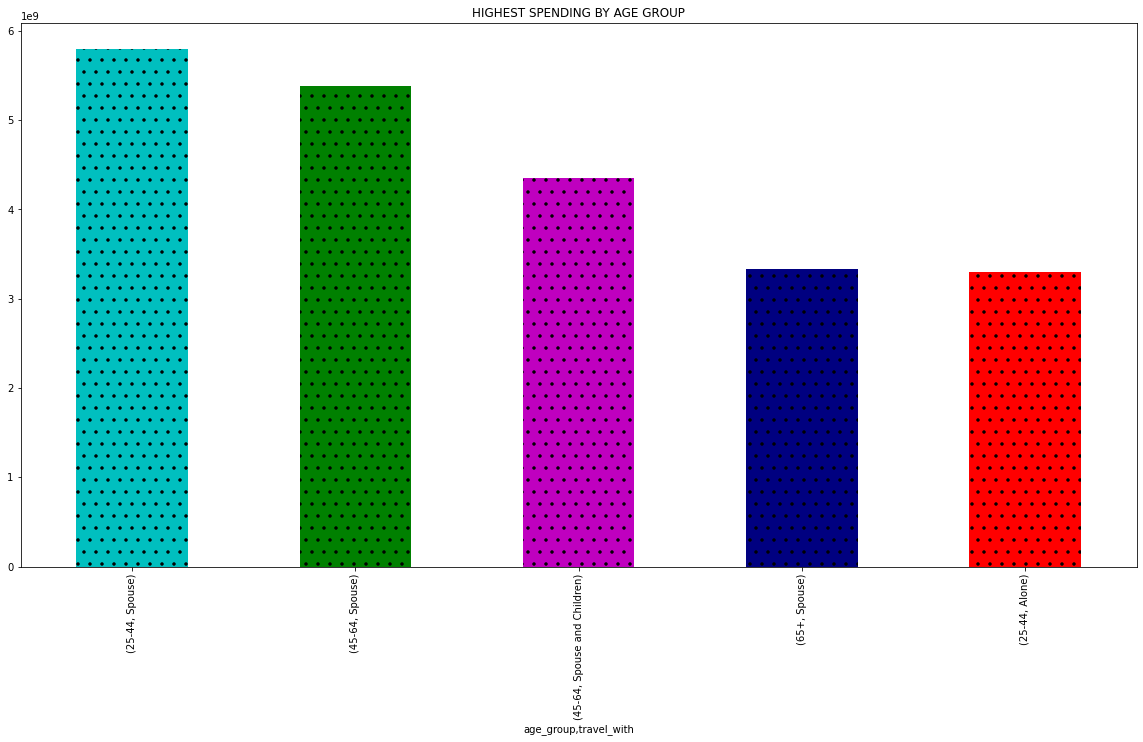

In [86]:
ag_sp_tw = tz_train.groupby(['age_group','travel_with'])['total_cost'].sum().nlargest().plot(kind='bar',color=['c','g','m','navy','r'],
hatch='.',title='HIGHEST SPENDING BY AGE GROUP',figsize=(20, 10))
"""This visualisation shows age 25_44 having the highest spending, although the variance is not large"""

* Tourists within the 45-64 years age group are the highest spenders with a total spending of about 15 billion TZS followed closely by 25-44 with a total spending of about 14 billion.


##Highest spenders by travel_with.

In [87]:
#groupby travel_with to get total spending by travel company
tz_train.groupby('travel_with')['total_cost'].sum().sort_values(ascending=False)


travel_with
Spouse                 1.509704e+10
Alone                  8.278547e+09
Friends/Relatives      6.717887e+09
Spouse and Children    6.598711e+09
Children               1.140954e+09
Name: total_cost, dtype: float64

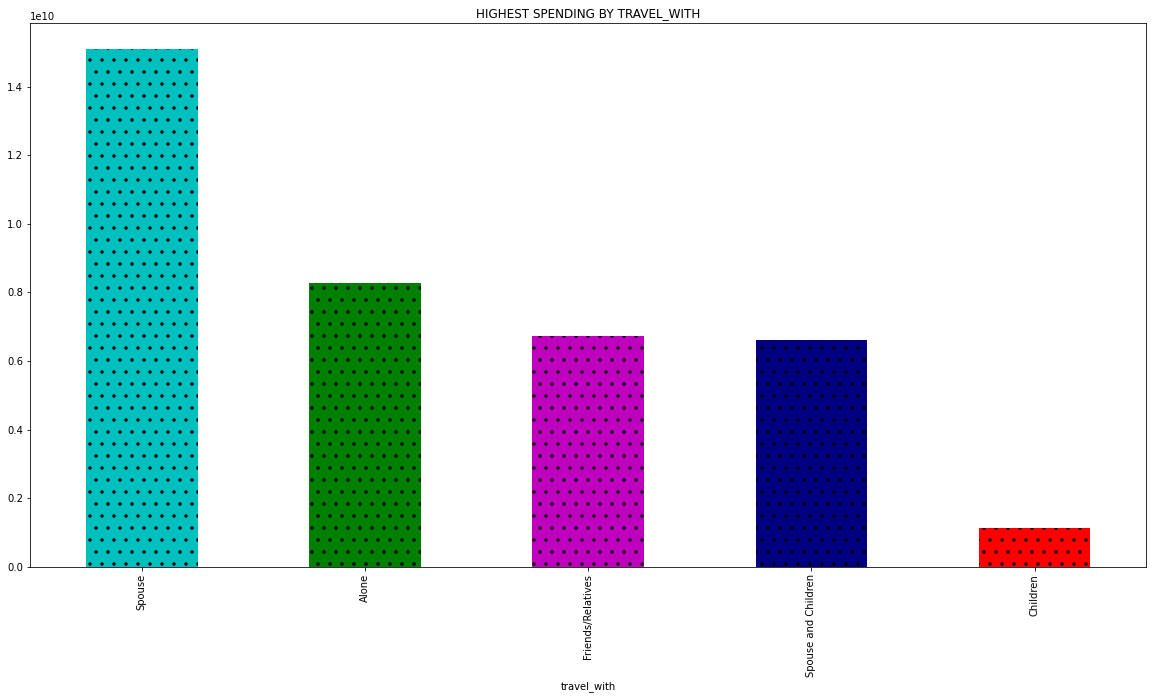

In [88]:
#bar chart of highest spenders by travel_with
ag_sp_tw = tz_train.groupby(['travel_with'])['total_cost'].sum().nlargest().plot(kind='bar',color=['c','g','m','navy','r'],
hatch='.',title='HIGHEST SPENDING BY TRAVEL_WITH',figsize=(20, 10))

* Those that travelled with just their spouses spent more than any other group with a net expenditure of about 15 billion TZS.

'This visualisation shows age 25_44 having the highest spending, though no much difference with others'

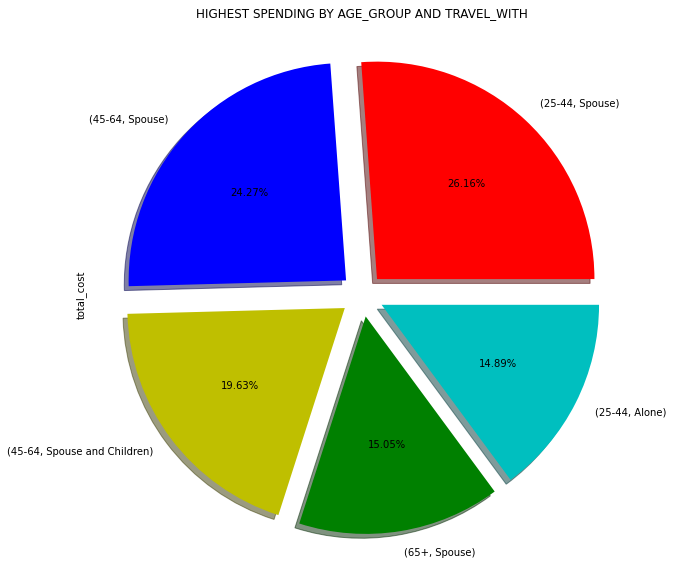

In [89]:
#which age-group are the highest spenders and who are the over all highest spenders by travel with?
ag_sp_tw = tz_train.groupby(['age_group','travel_with'])['total_cost'].sum().nlargest().plot(kind='pie',
autopct = '%1.2f%%',colors=['r','blue','y','g','c'],title='HIGHEST SPENDING BY AGE_GROUP AND TRAVEL_WITH',
explode = (0.1,0.1,0.1,0.1,0.1),shadow = True, figsize=[20, 10])
"""This visualisation shows age 25_44 having the highest spending, though no much difference with others"""

Average number of nights tourists spent in Tanzania Mainland.

In [90]:
round(tz_train.night_mainland.mean())

9

On average, tourists spend 9 nights in the Tanzania Mainland.

In [91]:
round(tz_train.night_zanzibar.mean())


2

On average, tourists spend 2 nights in Zanzibar.

#The most preferred payment mode by tourists.

In [92]:
#groupby payment_mode to get the most preferred payment mode by tourists
tz_train.groupby('payment_mode')['total_cost'].count().sort_values(ascending=False)

payment_mode
Cash                 3887
Credit Card           586
Other                   8
Travellers Cheque       7
Name: total_cost, dtype: int64

In [93]:
#calculating the percentage of the most preferred payment method
(4172/(tz_train.groupby('payment_mode')['total_cost'].count().sum())) * 100

92.95900178253119

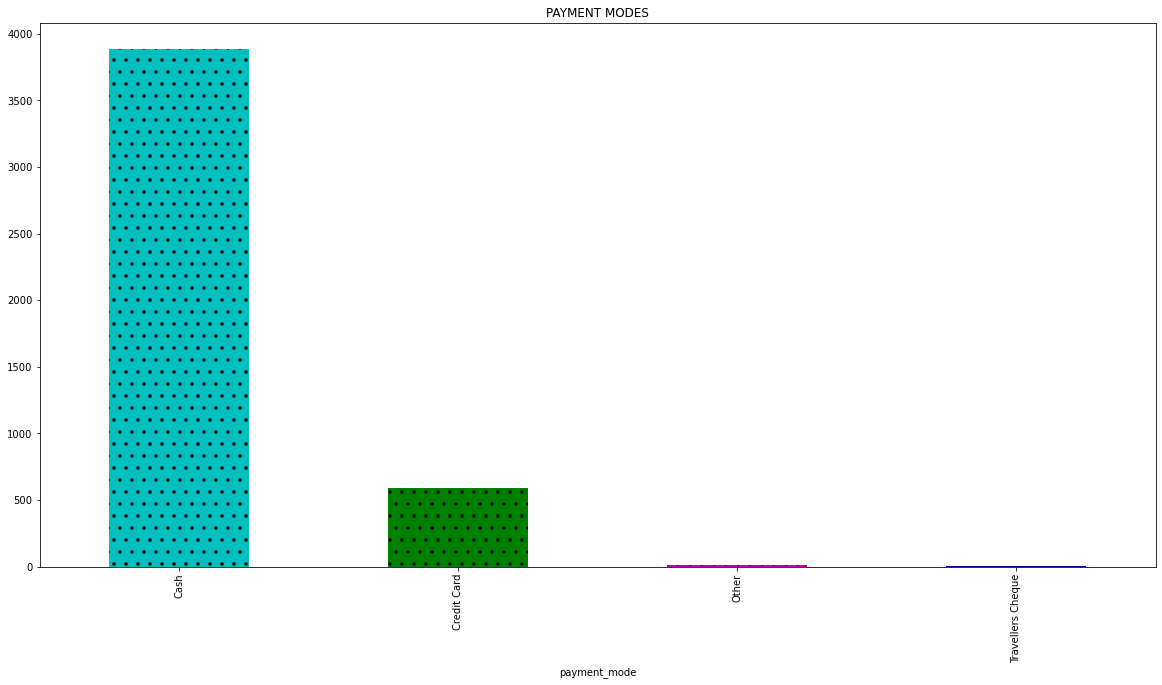

In [94]:
#bar chart of countries' spending per individual
ag_sp_tw = tz_train.groupby('payment_mode')['total_cost'].count().nlargest().plot(kind='bar',color=['c','g','m','navy','r'],
hatch='.',title="PAYMENT MODES",figsize=(20, 10))

In [95]:
* Most of the tourists prefer to pay with cash(~93% of the tour groups).

SyntaxError: invalid syntax (1650256120.py, line 1)

##Most profitable aspects of tourism in Tanzania.

In [96]:
#groupby main_activity to see the main activity tourists spent more on
tz_train.groupby('main_activity')['total_cost'].sum().sort_values(ascending=False)

main_activity
Wildlife tourism            2.339568e+10
Beach tourism               7.521120e+09
Conference tourism          3.719857e+09
Cultural tourism            1.338835e+09
Hunting tourism             6.591168e+08
business                    4.527686e+08
Mountain climbing           4.001968e+08
Diving and Sport Fishing    1.912312e+08
Bird watching               1.543285e+08
Name: total_cost, dtype: float64

<AxesSubplot:title={'center':'ACTIVITY SPENDING'}, xlabel='main_activity'>

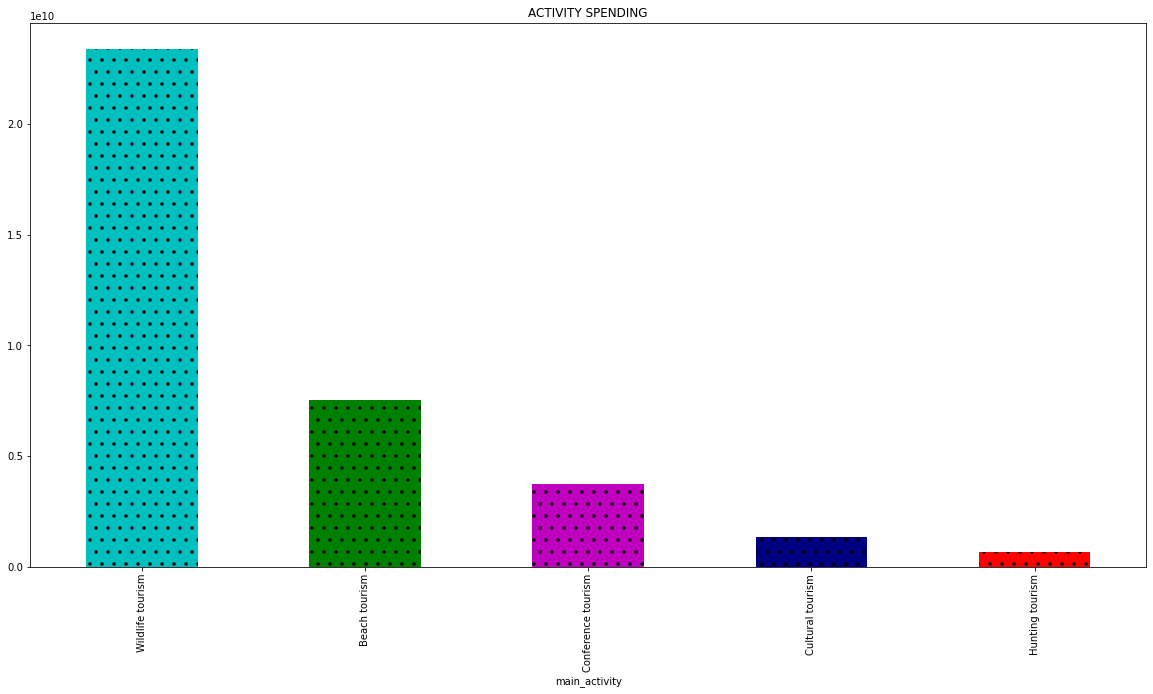

In [97]:
#bar chart of main_activity costs
tz_train.groupby('main_activity')['total_cost'].sum().nlargest().plot(kind='bar',color=['c','g','m','navy','r'],
hatch='.',title="ACTIVITY SPENDING",figsize=(20, 10))

In [98]:
#the main_activity frequency
tz_train['main_activity'].value_counts()

Wildlife tourism            2129
Beach tourism                969
Hunting tourism              390
Conference tourism           355
Cultural tourism             336
Mountain climbing            209
business                      56
Bird watching                 33
Diving and Sport Fishing      11
Name: main_activity, dtype: int64

<AxesSubplot:title={'center':'CTIVITY FREQUENCY'}>

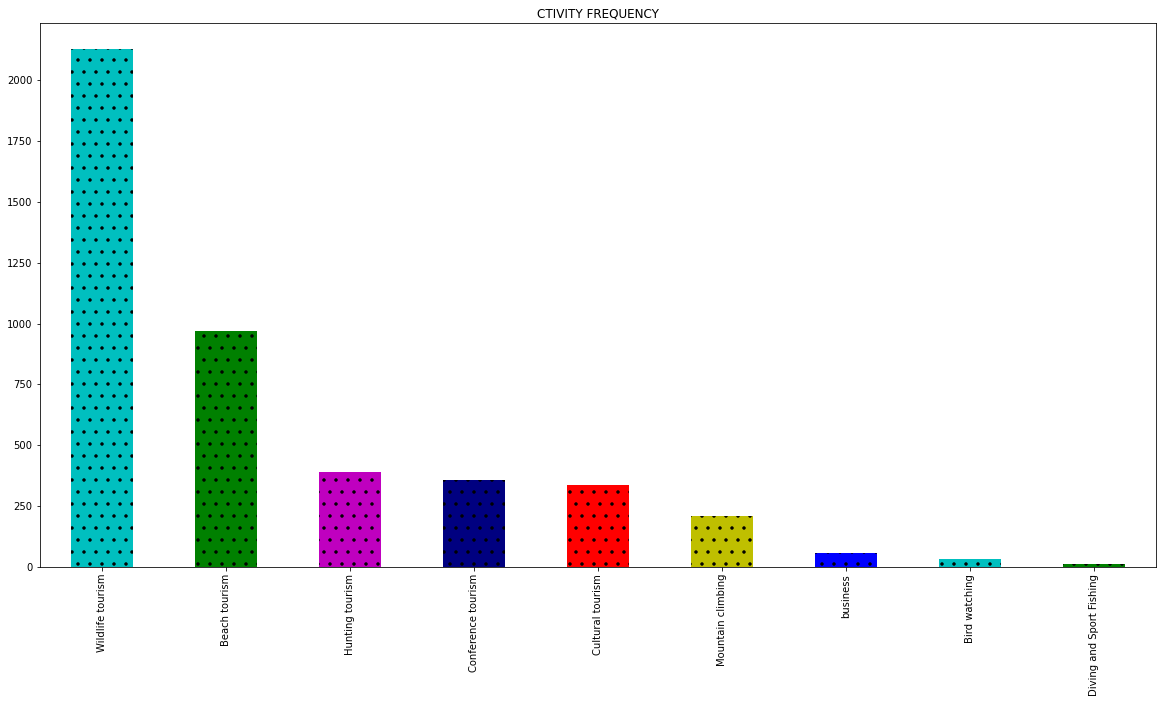

In [99]:
#bar chart of main_activity costs
tz_train['main_activity'].value_counts().sort_values(ascending=False).plot(kind='bar',color=['c','g','m','navy','r', 'y', 'b'],
hatch='.',title="CTIVITY FREQUENCY",figsize=(20, 10))

* Wildlife tourism is clearly the most chosen main activity and tourists that participated spent considerably more than those who had other main activities.


##Most sought after foods by tourists.

In [ ]:
No info on foods consumed by tourists in data.

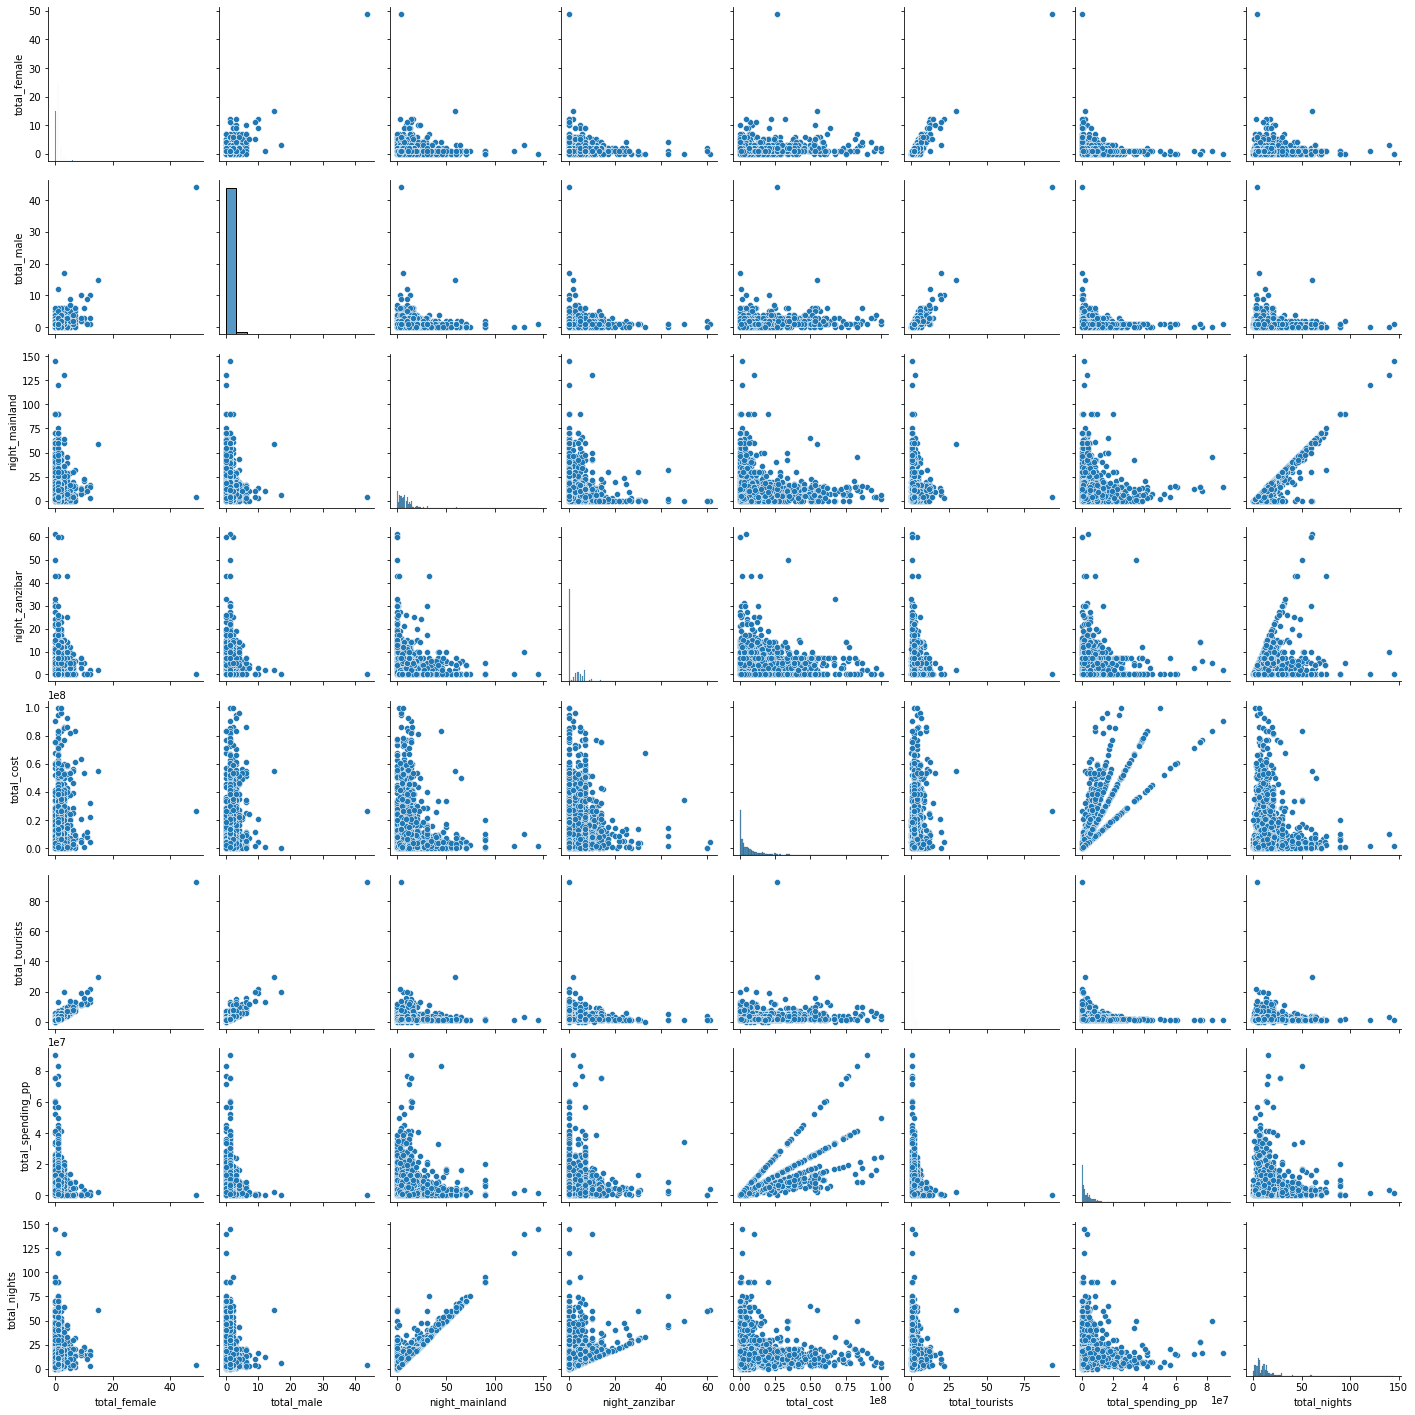

In [100]:
#pairplot to explore relationship between features
sns.pairplot(tz_train)

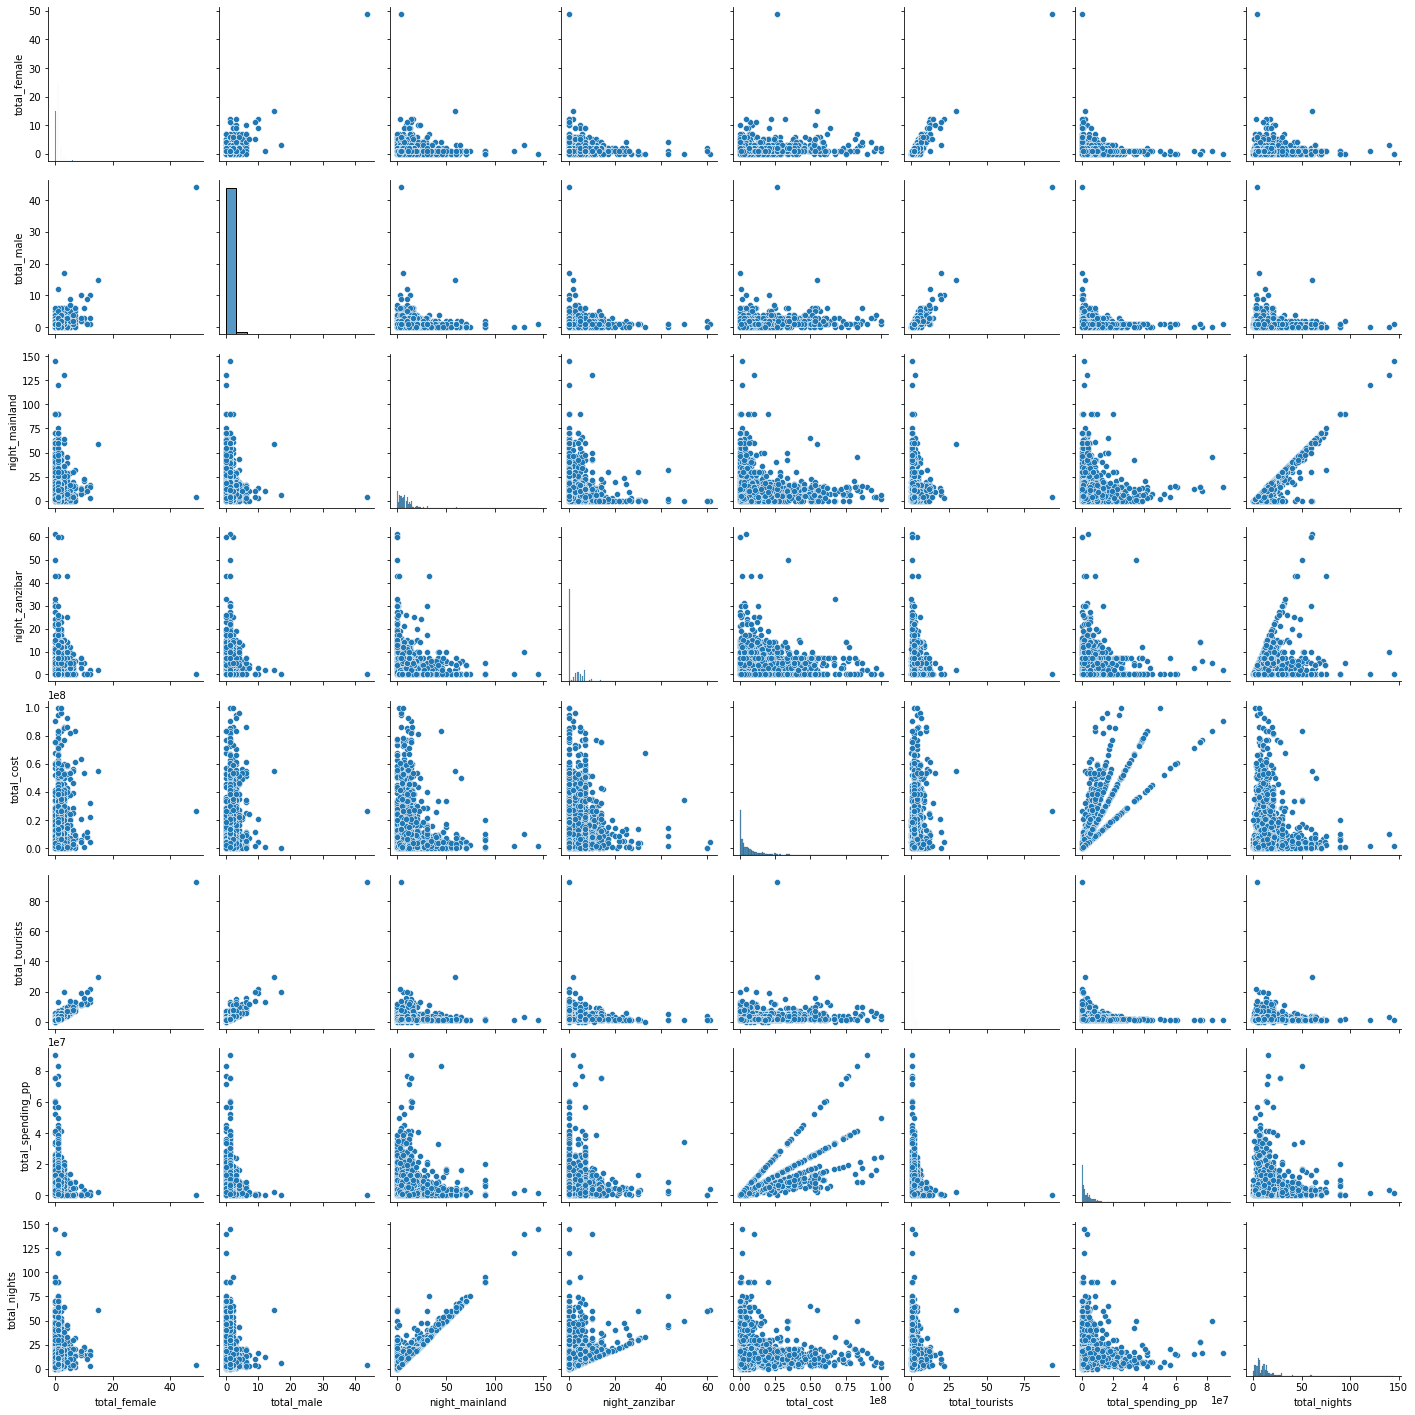

In [101]:
#pairplot to explore relationship between features
sns.pairplot(tz_train)

<AxesSubplot:>

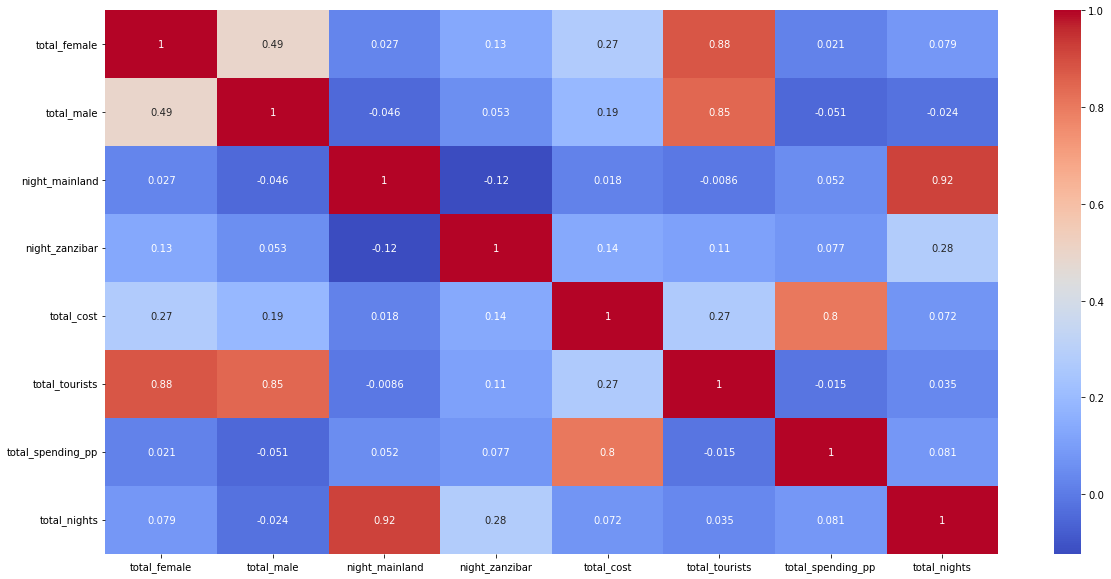

In [102]:
#heatmap to show correlation between features
plt.figure(figsize = (20, 10))
sns.heatmap(tz_train.corr(),cmap='coolwarm',annot=True)


In [ ]:
There is a slight correlation between total_tourists and night_zanzibar with the total_cost



<AxesSubplot:ylabel='Density'>

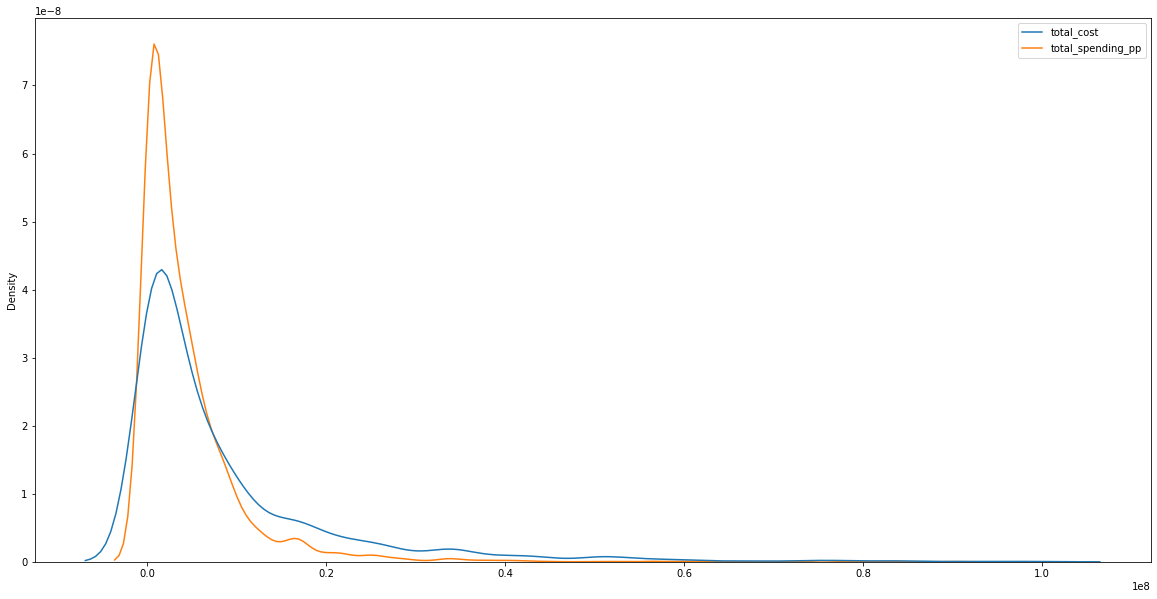

In [103]:
#kdeplot showing distriution of total spendings
plt.figure(figsize = (20, 10))
sns.kdeplot(data=tz_train[['total_cost', 'total_spending_pp']])

<AxesSubplot:ylabel='Density'>

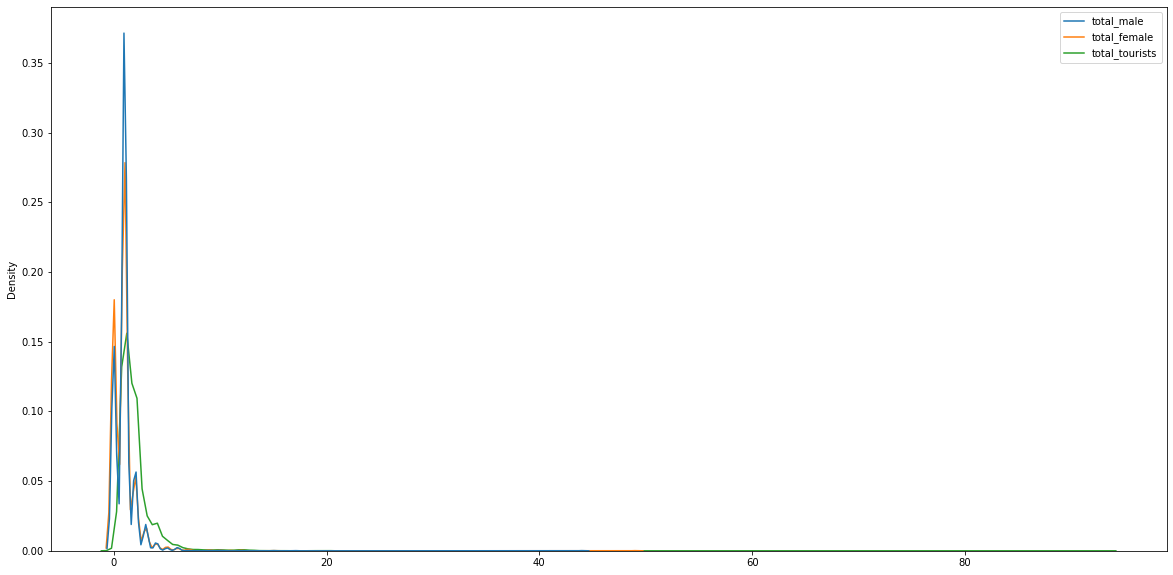

In [104]:
#kdeplot showing distriution of tourists
plt.figure(figsize = (20, 10))
sns.kdeplot(data=tz_train[['total_male', 'total_female', 'total_tourists']])

<AxesSubplot:ylabel='Density'>

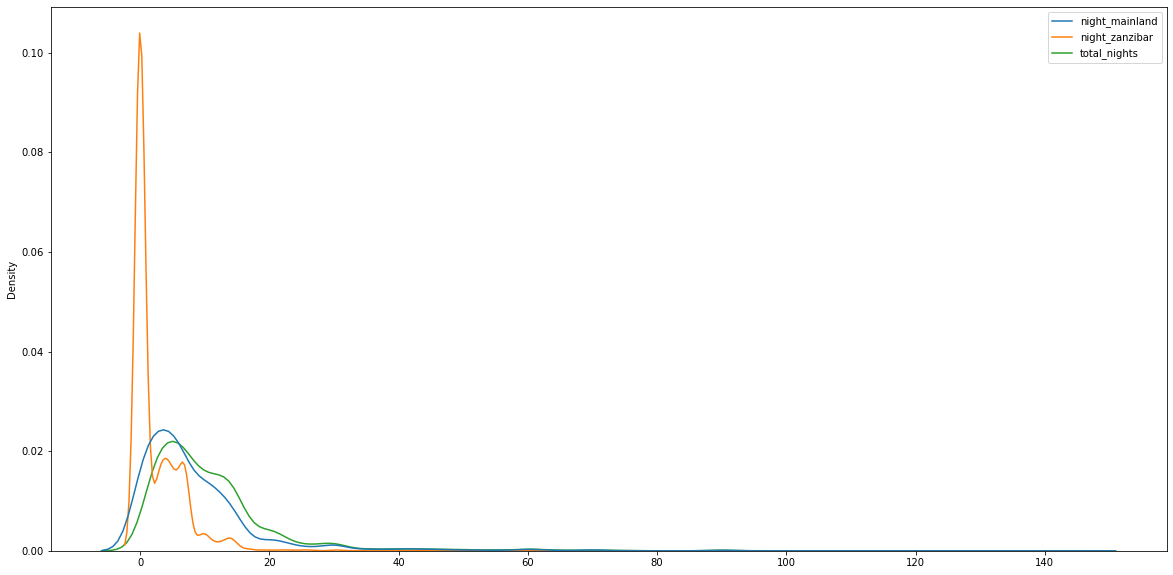

In [105]:
#kdeplot showing distriution of nights spent by tourists
plt.figure(figsize = (20, 10))
sns.kdeplot(data=tz_train[['night_mainland', 'night_zanzibar', 'total_nights']])


kdeplots show that the data is heavily skewed.

<AxesSubplot:>

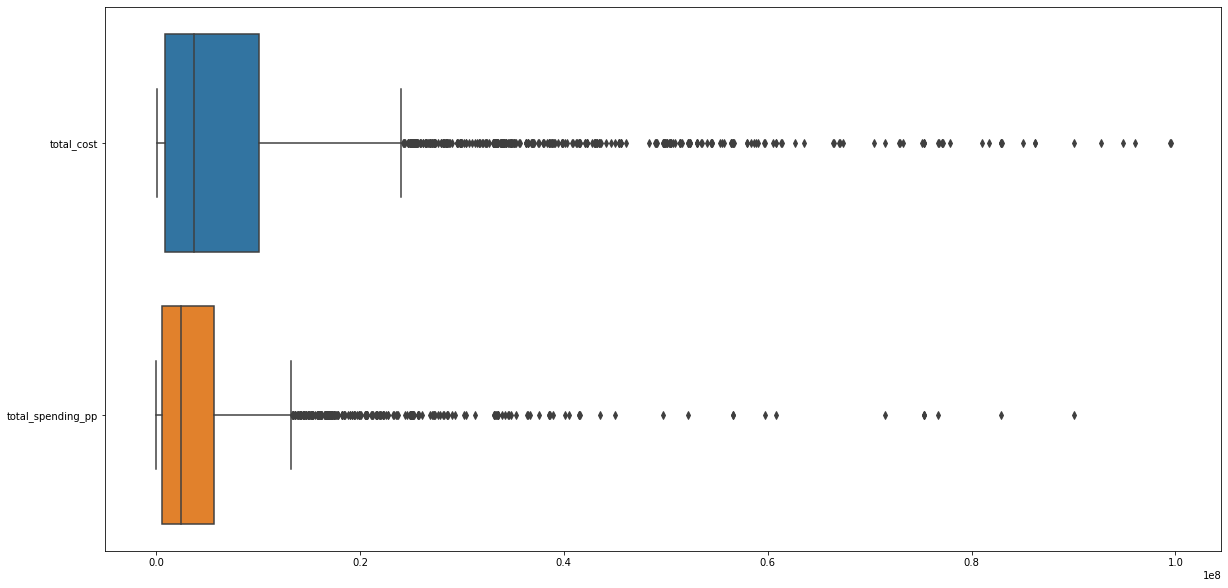

In [106]:
#boxplot to show outliers in total_cost and total_spending_pp
plt.figure(figsize=(20,10))
sns.boxplot(data=tz_train[['total_cost', 'total_spending_pp']], orient='h')

<AxesSubplot:>

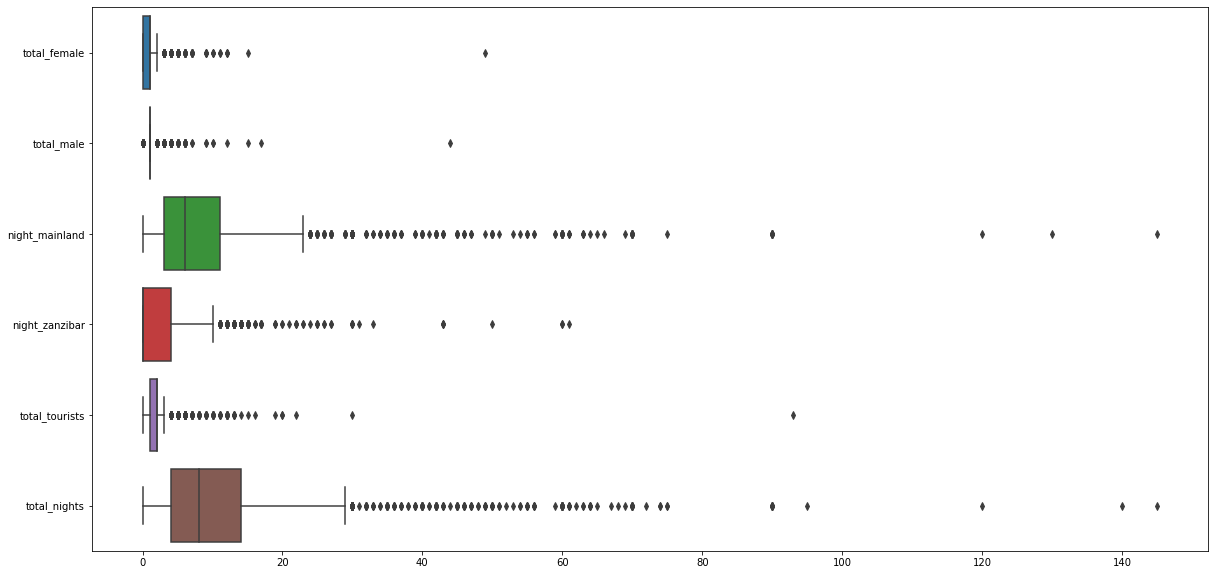

In [107]:
#boxplot showing outliers in remaining data
plt.figure(figsize=(20,10))
sns.boxplot(data=tz_train.drop(['total_cost', 'total_spending_pp'], axis=1), orient='h')

In [ ]:
boxplots show heavy presence of outliers.

In [109]:
#selecting features for model
y = tz_train['total_cost']
X = tz_train.drop(['ID', 'total_cost', 'total_spending_pp'], axis=1)

##selecting features for model

y = tz_train['total_cost'] X = tz_train[['total_tourists', 'travel_with', 'package_transport_int', 'total_nights', 'tour_arrangement', 'age_group', 'country', 'total_female', 'total_male', 'package_transport_tz']]



In [ ]:
ENCODING

In [110]:
#initialize label encoder
from sklearn.preprocessing import LabelEncoder
Lencoder = LabelEncoder()

In [111]:
#for-if loop selects object columns and encodes
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = Lencoder.fit_transform(X[col])

In [112]:
#convert all float values to int
for col in X.columns:
    if X[col].dtype == 'float64':
        X[col] = X[col].apply('int64')

##heatmap to show correlation between features

<AxesSubplot:>

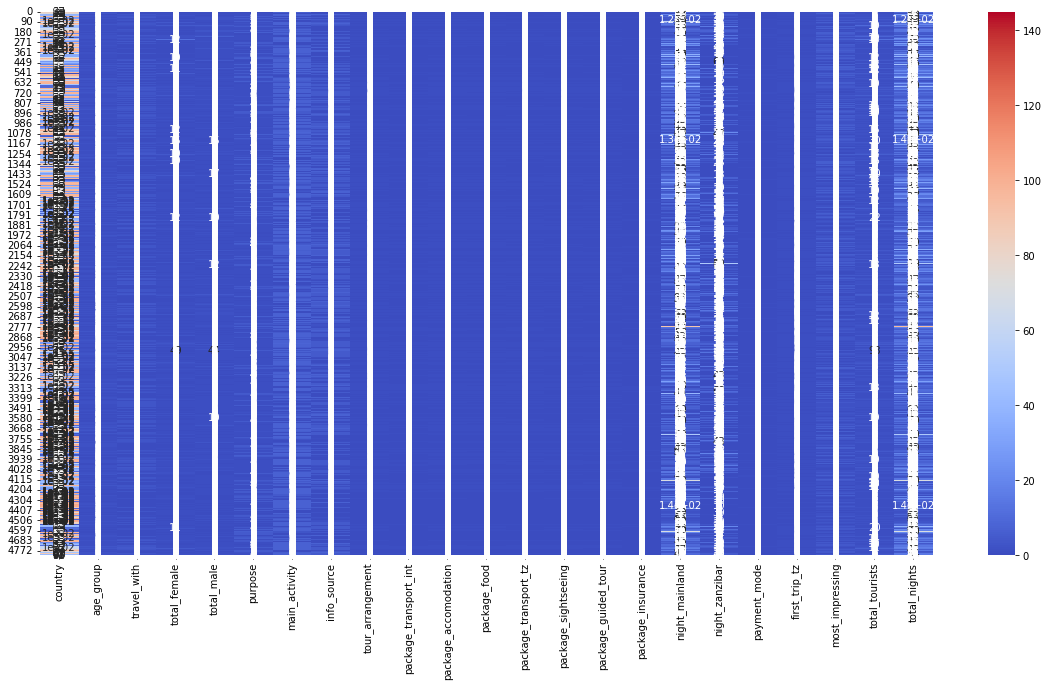

In [113]:
plt.figure(figsize = (20, 10))
sns.heatmap(X,cmap='coolwarm',annot=True)

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Feature importance
- scaling

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Building a Regression Model

In [114]:
from sklearn.model_selection import train_test_split

# splitting the training dataset to train and test groups for our model to learn and test on
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 40)

##USING LINER REGRESSION

In [115]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [116]:
predictions = model.predict(X_test)
predictions

array([ 5020051.44488917, 12933435.21244761,   577100.87846551, ...,
        2646284.88146413,  1475619.97487483, 18750853.37321356])

## Evaluate Model Performances

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [118]:
r2_score(y_test, predictions)

0.345590221269627

In [119]:
mean_absolute_error(y_test, predictions)

5655951.548588022

In [120]:
mean_squared_error(y_test, predictions)

92875288935062.1

In [121]:
np.sqrt(mean_squared_error(y_test, predictions))

9637182.624349406

##Using XGBoost

In [122]:
from xgboost import XGBRegressor

XGB = XGBRegressor()

XGB.fit(X_train, y_train)

predictions = XGB.predict(X_test)
predictions

array([ 7849390.5 , 37692832.  ,   470242.66, ...,  1670149.2 ,
        2617847.8 , 34589384.  ], dtype=float32)

##Evaluate Model Performances

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [124]:
r2_score(y_test, predictions)

0.28956964417183295

In [125]:
mean_absolute_error(y_test, predictions)

5663446.486139616

In [126]:
mean_squared_error(y_test, predictions)

100825853632247.4

In [127]:
np.sqrt(mean_squared_error(y_test, predictions))

10041207.777565775

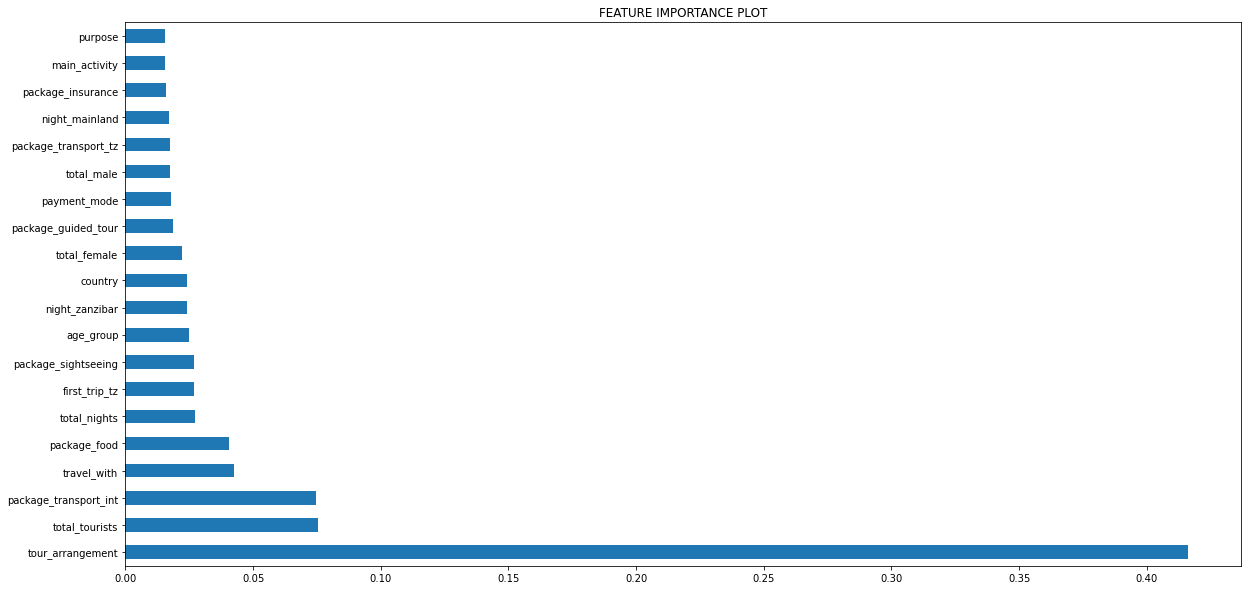

In [128]:
#Let's Visualize on the best contributed features
feat_importances = pd.Series(XGB.feature_importances_, index = X.columns)
plt.figure(figsize=(20,10))
plt.title("FEATURE IMPORTANCE PLOT")
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Testing Linear Model Assumptions

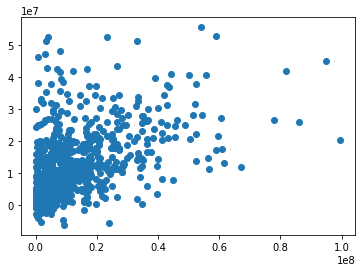

In [129]:
plt.scatter(y_test, predictions)

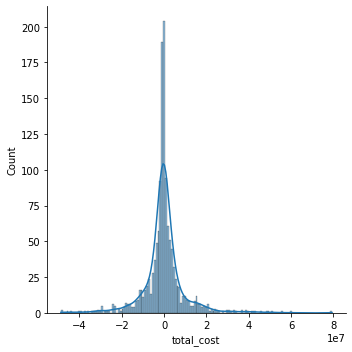

In [130]:
sns.displot((y_test-predictions), kde = True)

## Actionable Insights and Recommendations

In [131]:
- Linear regression model was employed for the prediction of the total cost. The model gave a coefficient of determination score of 0.25 which is low, so we explored other regression models like the XGBoost.

- Model performance of the XGBoost is 0.20 which is lower, this might be as a result of the weak correlation between features. Hence, we suggest other regression models should be explored.

- More attention and investment should be given to the wildlife tourism as it is the major area of interest for tourist.

- The feature importance gives us a general overview of the most important features that are vital in predicting the total cost. These features include travel with, package transport international, total tourists, and tour arrangement.

SyntaxError: invalid syntax (1431002766.py, line 1)

## Prediction

In [132]:
#encode test data
#for-if loop selects object columns and encodes
for col in tz_test.columns:
    if tz_test[col].dtype == 'object':
        tz_test[col] = Lencoder.fit_transform(tz_test[col])

In [133]:
#convert all float values to int
for col in tz_test.columns:
    if tz_test[col].dtype == 'float64':
        tz_test[col] = tz_test[col].apply('int64')

In [134]:
test_predict = model.predict(tz_test.drop(['ID'], axis=1))

In [135]:
tz_test['predicted_prices'] = test_predict
tz_test

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_tourists,total_nights,predicted_prices
0,0,1,2,3,1,1,1,7,5,1,...,1,1,10,3,0,1,0,2,13,1.893218e+07
1,1,69,1,2,0,4,0,7,3,1,...,0,0,13,0,0,0,6,4,13,1.118606e+07
2,2,26,1,2,3,0,1,0,0,0,...,0,0,7,14,0,0,4,3,21,6.349319e+06
3,3,10,0,2,2,0,1,3,7,0,...,0,0,0,4,0,1,2,2,4,1.520915e+06
4,4,80,2,2,2,2,1,7,0,1,...,0,0,10,0,0,1,2,4,10,1.716914e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1481,69,1,2,1,2,0,7,1,0,...,0,0,2,0,1,1,4,3,2,6.889810e+06
1597,1482,37,2,4,3,1,1,7,0,1,...,0,0,10,5,2,1,0,4,15,2.238498e+07
1598,1483,24,1,0,0,1,2,6,0,0,...,0,0,6,0,0,1,4,1,6,2.044892e+04
1599,1484,69,0,0,0,1,0,0,0,0,...,0,0,4,0,0,1,0,1,4,-2.269935e+06
